In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import warnings
warnings.filterwarnings('ignore')

In [1]:
... 

Ellipsis

## Initial Features

`encounter_id` : The unique identifier of the encounter <br>
`country` : Country <br>
`patient_id`:  Identifier of the patient <br>
`race` : Patient's race <br>
`gender`: Patient's gender <br>
`age`: Patient’s age <br>
`Weight`: Patient's Weight <br>
`payer_code`: Code of the health insurance provider (if there is one) <br>
`outpatient_visits_in_previous_year`: Number of outpatient visits (visits made with the intention
of leaving on the same day) the patient made to the hospital in the year preceding the encounter <br>
`emergency_visits_in_previous_year`: Number of emergency visits the patient made to the hospital
in the year preceding the encounter <br>
`inpatient_visits_in_previous_year`: Number of inpatient visits (visits with the intention to stay overnight) the patient made to the hospital in the year preceding the encounter
<br>
`admission_type`: Type of admission of the patient (e.g. Emergency, Urgent,
etc...) <br>
`medical_specialty`: Medical specialty on which the patient was admitted <br>
`average_pulse_bpm`: Average pulse of the patient during their stay in the hospital
in beats per minute <br>
`discharge_disposition` : Destination given to the patient after being discharged<br>
`admission_source` : Source of the patient before being admitted in the current
encounter
<br>
`length_of_stay_in_hospital` : Number of days between admission and discharge <br>
`number_lab_tests`: Number of lab tests performed during the encounter <br>
`non_lab_procedures` : Number of non-lab procedures performed during the
encounter <br>
`number_of_medications` : Number of distinct types of medication administered during
the encounter <br>
`primary_diagnosis` : Primary diagnosis (coded as first three digits of ICD9) <br>
`secondary_diagnosis` : Secondary diagnosis (first three digits of ICD9) <br>
`additional_diagnosis` : Additional secondary diagnosis (first three digits of ICD9) <br>
`number_diagnoses` : Number of diagnoses entered to the system <br>
`glucose_test_result` : Range of the glucose test results or if the test was not taken <br>
`a1c_test_result` : Range of the A1C test results or if the test was not taken.<br>
`change_in_meds_during_hospitalization` : Indicates if there was a change in diabetic medications
(dosage or generic name). <br>
`prescribed_diabetes_meds` : Yes if patient has diabetes medication perscribed. No
otherwise. <br>
`medication` : List containing all generic names for the medications
perscribed to the patient during the encounter. Empty list if
no medication was perscribed. <br>

## Features after pre-process
- Race 
- Payer_code
- admission_type
- medical_specialty
- discharge_disposition
- admission_source 
- primary_diagnosis_types
- secondary_diagnosis_types
- additional_diagnosis_types
- glucose_test_result
- a1c_test_result 
- outpatient_visits
- emergency_visits
- inpatient_visits
- average_pulse_bpm
- length_of_stay
- number_lab_tests
- non_lab_procedures
- number_of_medications
- number_diagnoses
- race_caucasian
- number_generic_medications
- metformin
- insulin
- Sulfonylureas
- Meglitinides
- Thiazolidinediones
- Alpha_Glucosidase_Inhibitors
- Combination_Medications
- Midpoint_Age
- gender_binary
- presc_diabetes_meds_binary
- change_in_meds_binary
- Has_Insurance
- is_normal_pulse
- number_encounters_total
- Total_visits
- Serious_condition_visits


## Target Variable
`readmitted_binary` : Binary target: Yes if patient was readmitted in less than 30
days, No otherwise. <br>

### Read the files

In [2]:
hospital_X = pd.read_csv('../data/02_intermediate/hospital_X.csv', index_col='encounter_id')
hospital_y = pd.read_csv('../data/02_intermediate/hospital_y.csv', index_col='encounter_id')

In [3]:
hospital_X.head()

race payer_code  outpatient_visits  emergency_visits  \
encounter_id                                                                    
533253              Caucasian       None                  0                 0   
426224        AfricanAmerican       None                  0                 0   
634063              Caucasian       None                  0                 0   
890610        AfricanAmerican         MC                  0                 0   
654194              Caucasian         HM                  1                 0   

              inpatient_visits    admission_type       medical_specialty  \
encounter_id                                                               
533253                       2  Urgent/Emergency  Family_GeneralPractice   
426224                       0  Urgent/Emergency                 Unknown   
634063                       1        Other_type  Family_GeneralPractice   
890610                       1  Urgent/Emergency        InternalMedicine   
654194                       0          Elective                 Unknown   

              average_pulse_bpm                    discharge_disposition  \
encounter_id                                                               
533253                      127                       Discharged_to_home   
426224                      128  Transferred_to_another_medical_facility   
634063                       94                       Discharged_to_home   
890610                       81                       Discharged_to_home   
654194                      126                       Discharged_to_home   

             admission_source  ...  presc_diabetes_meds_binary  \
encounter_id                   ...                               
533253         Emergency_Room  ...                           0   
426224               Referral  ...                           1   
634063              No_source  ...                           1   
890610           Other_source  ...                           0   
654194               Referral  ...                           0   

              change_in_meds_binary  Has_Insurance  primary_diagnosis_types  \
encounter_id                                                                  
533253                            0              0              Respiratory   
426224                            0              0     Infectious_Parasitic   
634063                            1              0                Digestive   
890610                            0              1                Digestive   
654194                            0              1          Musculoskeletal   

              secondary_diagnosis_types additional_diagnosis_types  \
encounter_id                                                         
533253                        Metabolic                Respiratory   
426224        Symptoms_Signs_Conditions                  Neoplasms   
634063             Infectious_Parasitic                   Diabetes   
890610                        Digestive                Circulatory   
654194                    Genitourinary                Circulatory   

             is_normal_pulse  number_encounters_total  Total_visits  \
encounter_id                                                          
533253                     0                        6             2   
426224                     0                        1             0   
634063                     1                        1             1   
890610                     1                        1             1   
654194                     0                        2             1   

              Serious_condition_visits  
encounter_id                            
533253                               2  
426224                               0  
634063                               1  
890610                               1  
654194                               0  

[5 rows x 38 columns]

In [4]:
hospital_y.head()

readmitted_binary
encounter_id                  
533253                      No
426224                      No
634063                      No
890610                      No
654194                      No

In [5]:
hospital_X.shape

(71236, 38)

In [6]:
hospital_y.shape

(71236, 1)

In [7]:
hospital_X.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [8]:
hospital_y.columns

Index(['readmitted_binary'], dtype='object')

In [9]:
hospital_X.describe(include = 'all').T

count unique                 top   freq  \
race                            71236      6           Caucasian  51779   
payer_code                      71236     11                None  28201   
outpatient_visits             71236.0    NaN                 NaN    NaN   
emergency_visits              71236.0    NaN                 NaN    NaN   
inpatient_visits              71236.0    NaN                 NaN    NaN   
admission_type                  71236      3    Urgent/Emergency  50779   
medical_specialty               71236      7             Unknown  34922   
average_pulse_bpm             71236.0    NaN                 NaN    NaN   
discharge_disposition           71236      7  Discharged_to_home  51342   
admission_source                71236      4      Emergency_Room  40319   
length_of_stay                71236.0    NaN                 NaN    NaN   
number_lab_tests              71236.0    NaN                 NaN    NaN   
non_lab_procedures            71236.0    NaN                 NaN    NaN   
number_of_medications         71236.0    NaN                 NaN    NaN   
number_diagnoses              71236.0    NaN                 NaN    NaN   
glucose_test_result             71236      3           Not_taken  67548   
a1c_test_result                 71236      3           Not_taken  59320   
race_caucasian                71236.0    NaN                 NaN    NaN   
number_generic_medications    71236.0    NaN                 NaN    NaN   
insulin                       71236.0    NaN                 NaN    NaN   
metformin                     71236.0    NaN                 NaN    NaN   
Sulfonylureas                 71236.0    NaN                 NaN    NaN   
Meglitinides                  71236.0    NaN                 NaN    NaN   
Thiazolidinediones            71236.0    NaN                 NaN    NaN   
Alpha_Glucosidase_Inhibitors  71236.0    NaN                 NaN    NaN   
Combination_Medications       71236.0    NaN                 NaN    NaN   
Midpoint_Age                  69019.0    NaN                 NaN    NaN   
gender_binary                 71236.0    NaN                 NaN    NaN   
presc_diabetes_meds_binary    71236.0    NaN                 NaN    NaN   
change_in_meds_binary         71236.0    NaN                 NaN    NaN   
Has_Insurance                 71236.0    NaN                 NaN    NaN   
primary_diagnosis_types         71236     18         Circulatory  21223   
secondary_diagnosis_types       71236     18         Circulatory  21999   
additional_diagnosis_types      71236     18         Circulatory  20959   
is_normal_pulse               71236.0    NaN                 NaN    NaN   
number_encounters_total       71236.0    NaN                 NaN    NaN   
Total_visits                  71236.0    NaN                 NaN    NaN   
Serious_condition_visits      71236.0    NaN                 NaN    NaN   

                                   mean        std   min   25%    50%    75%  \
race                                NaN        NaN   NaN   NaN    NaN    NaN   
payer_code                          NaN        NaN   NaN   NaN    NaN    NaN   
outpatient_visits              0.369588   1.287469   0.0   0.0    0.0    0.0   
emergency_visits               0.196249   0.910854   0.0   0.0    0.0    0.0   
inpatient_visits               0.640154   1.267271   0.0   0.0    0.0    1.0   
admission_type                      NaN        NaN   NaN   NaN    NaN    NaN   
medical_specialty                   NaN        NaN   NaN   NaN    NaN    NaN   
average_pulse_bpm             99.611222  23.040521  60.0  80.0  100.0  119.0   
discharge_disposition               NaN        NaN   NaN   NaN    NaN    NaN   
admission_source                    NaN        NaN   NaN   NaN    NaN    NaN   
length_of_stay                 4.391024   2.988739   1.0   2.0    4.0    6.0   
number_lab_tests              43.095654  19.642919   1.0  31.0   44.0   57.0   
non_lab_procedures             1.340923   1.706664   0.0   0.0    

In [10]:
hospital_y.describe()

readmitted_binary
count              71236
unique                 2
top                   No
freq               63286

In [11]:
hospital_X.isna().sum()

race                               0
payer_code                         0
outpatient_visits                  0
emergency_visits                   0
inpatient_visits                   0
admission_type                     0
medical_specialty                  0
average_pulse_bpm                  0
discharge_disposition              0
admission_source                   0
length_of_stay                     0
number_lab_tests                   0
non_lab_procedures                 0
number_of_medications              0
number_diagnoses                   0
glucose_test_result                0
a1c_test_result                    0
race_caucasian                     0
number_generic_medications         0
insulin                            0
metformin                          0
Sulfonylureas                      0
Meglitinides                       0
Thiazolidinediones                 0
Alpha_Glucosidase_Inhibitors       0
Combination_Medications            0
Midpoint_Age                    2217
g

In [12]:
hospital_y.isna().sum()

readmitted_binary    0
dtype: int64

In [13]:
hospital_X.duplicated().sum()

0

In [14]:
hospital_y.duplicated().sum()

71234

### Visual Exploration


In [15]:
hospital_X.dtypes

race                             object
payer_code                       object
outpatient_visits                 int64
emergency_visits                  int64
inpatient_visits                  int64
admission_type                   object
medical_specialty                object
average_pulse_bpm                 int64
discharge_disposition            object
admission_source                 object
length_of_stay                    int64
number_lab_tests                  int64
non_lab_procedures                int64
number_of_medications             int64
number_diagnoses                  int64
glucose_test_result              object
a1c_test_result                  object
race_caucasian                    int64
number_generic_medications        int64
insulin                           int64
metformin                         int64
Sulfonylureas                     int64
Meglitinides                      int64
Thiazolidinediones                int64
Alpha_Glucosidase_Inhibitors      int64


In [16]:
metric_features = hospital_X.select_dtypes(include=['int64', 'float64'])
non_metric_features = hospital_X.select_dtypes(exclude=['int64', 'float64'])

In [17]:
metric_features = hospital_X[['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay',
                                'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
                                'number_generic_medications', 'Midpoint_Age', 'number_encounters_total', 'Total_visits', 'Serious_condition_visits']]


In [18]:
# List of column names to drop
columns_to_drop = ['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay',
                   'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
                   'number_generic_medications', 'Midpoint_Age', 'number_encounters_total', 'Total_visits', 'Serious_condition_visits']

# Dropping the columns from the DataFrame
non_metric_features = hospital_X.drop(columns=columns_to_drop, axis=1)


### Metric 

In [19]:
metric_features.columns

Index(['outpatient_visits', 'emergency_visits', 'inpatient_visits',
       'average_pulse_bpm', 'length_of_stay', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
       'number_generic_medications', 'Midpoint_Age', 'number_encounters_total',
       'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [20]:
non_metric_features.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'insulin', 'metformin',
       'Sulfonylureas', 'Meglitinides', 'Thiazolidinediones',
       'Alpha_Glucosidase_Inhibitors', 'Combination_Medications',
       'gender_binary', 'presc_diabetes_meds_binary', 'change_in_meds_binary',
       'Has_Insurance', 'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse'],
      dtype='object')

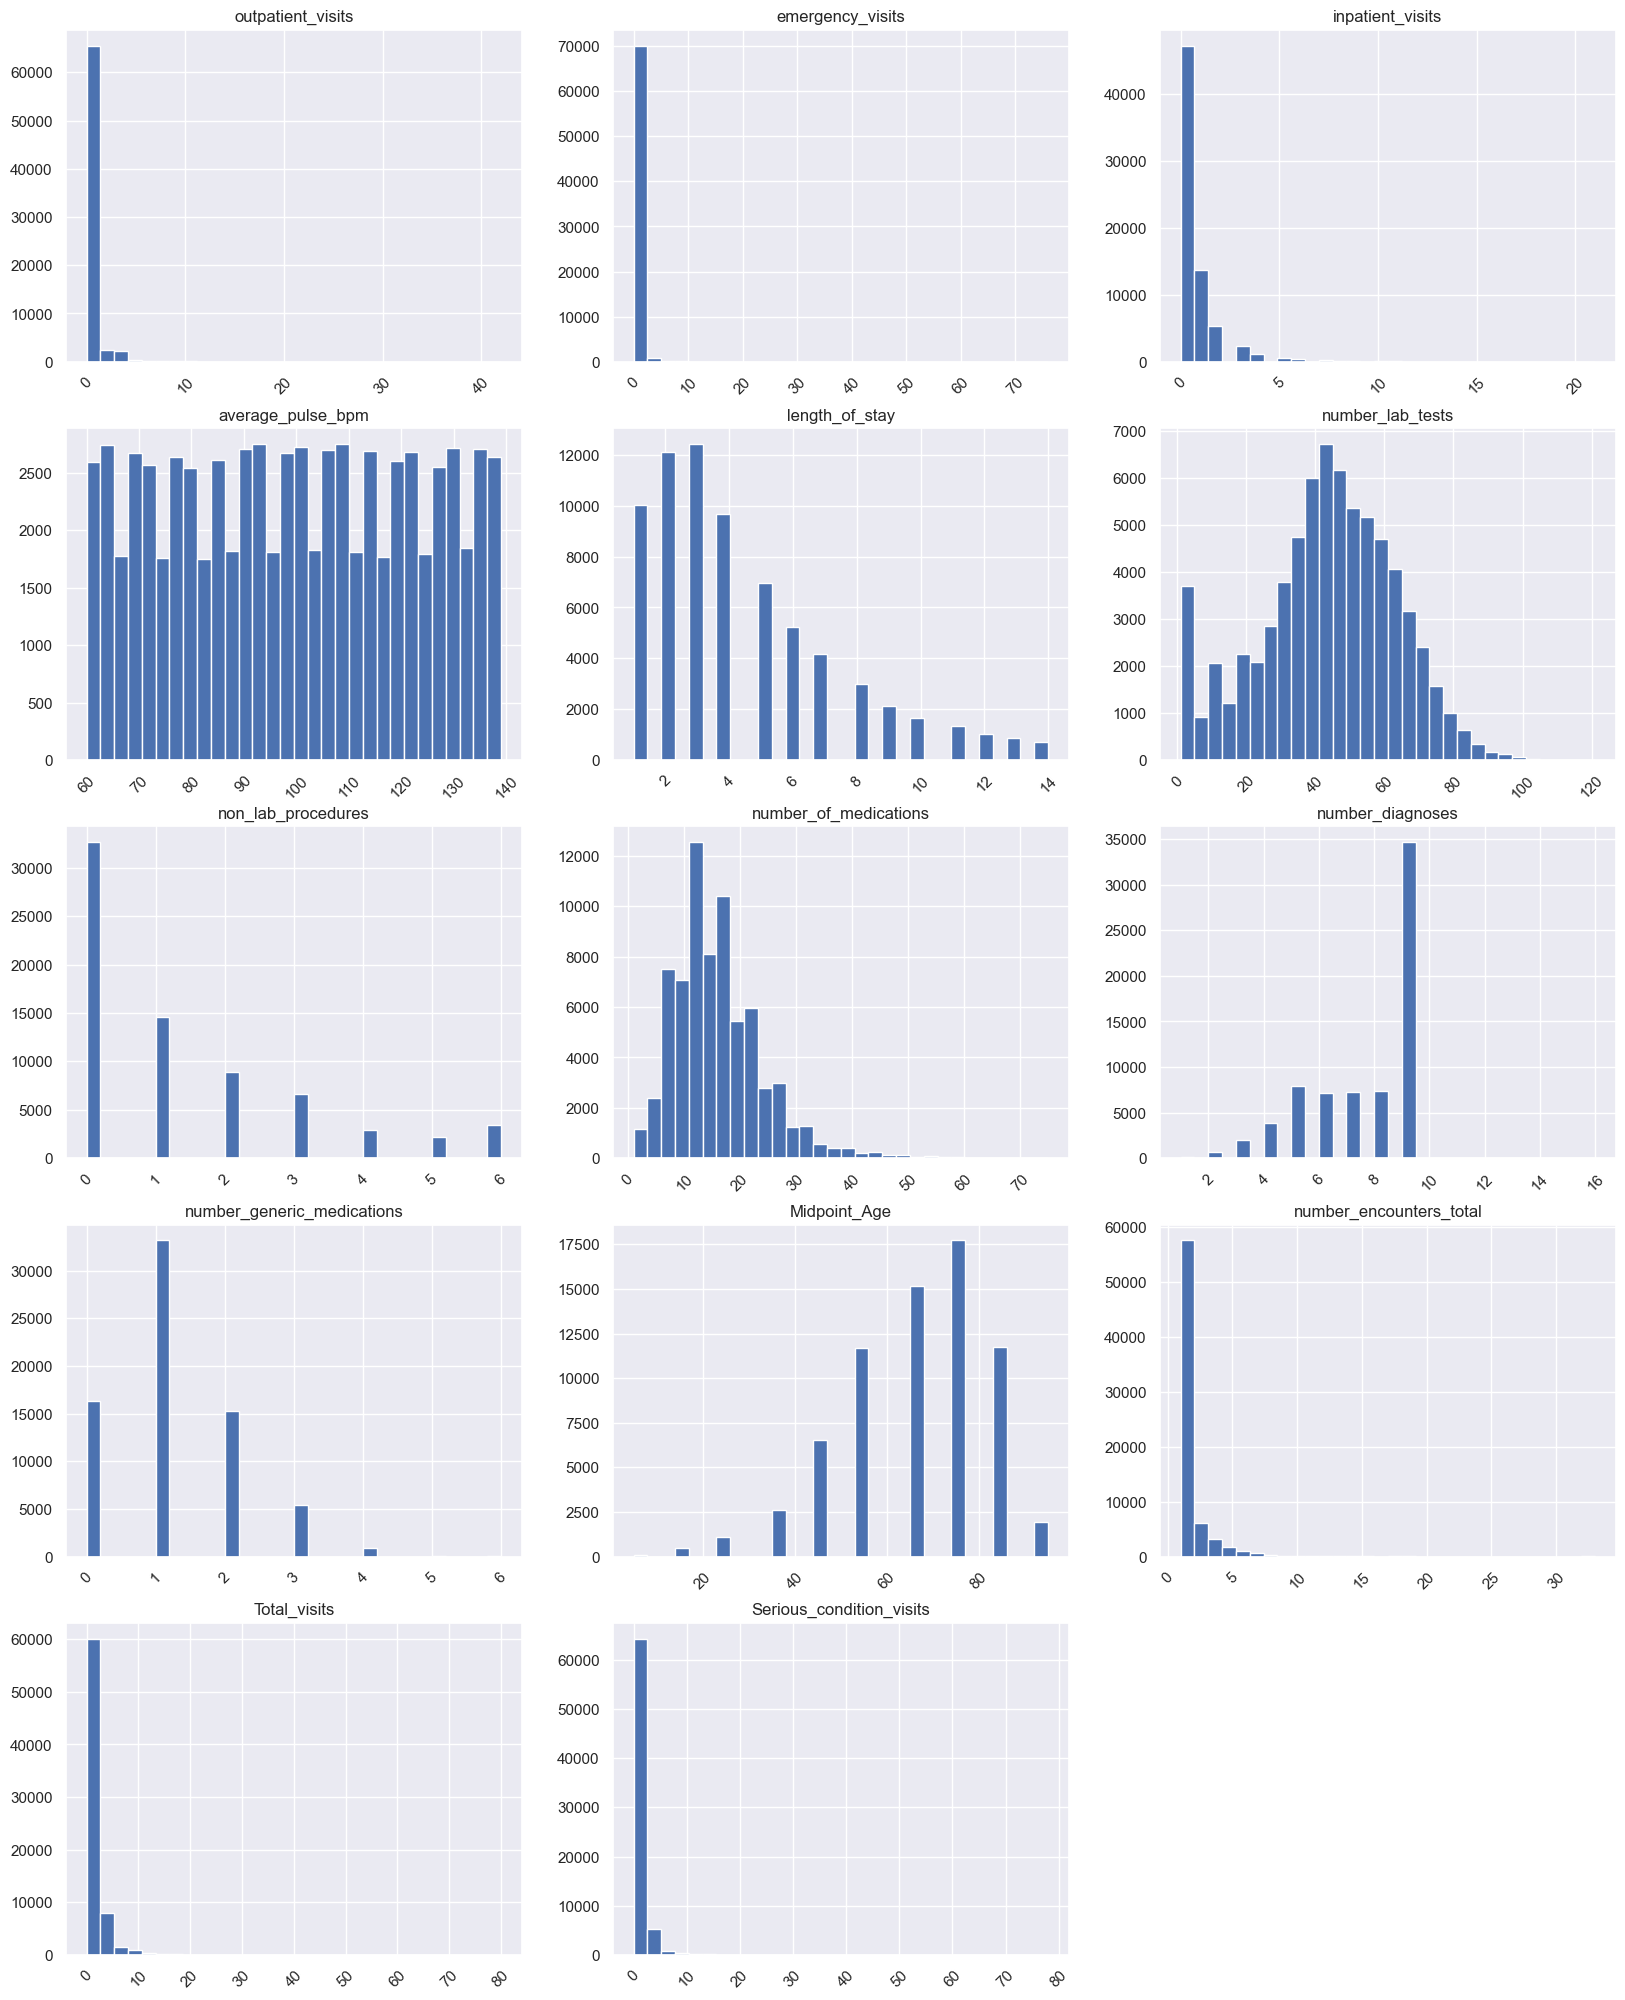

In [21]:
sns.set()

n_cols = 3
n_rows = ceil(len(metric_features.columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))  

axes = axes.flatten()
for i in range(len(metric_features.columns), len(axes)):
    fig.delaxes(axes[i])


for ax, feat in zip(axes, metric_features.columns): 
    ax.hist(metric_features[feat], bins=30) 
    ax.set_title(feat)
    ax.tick_params(axis='x', rotation=45) 

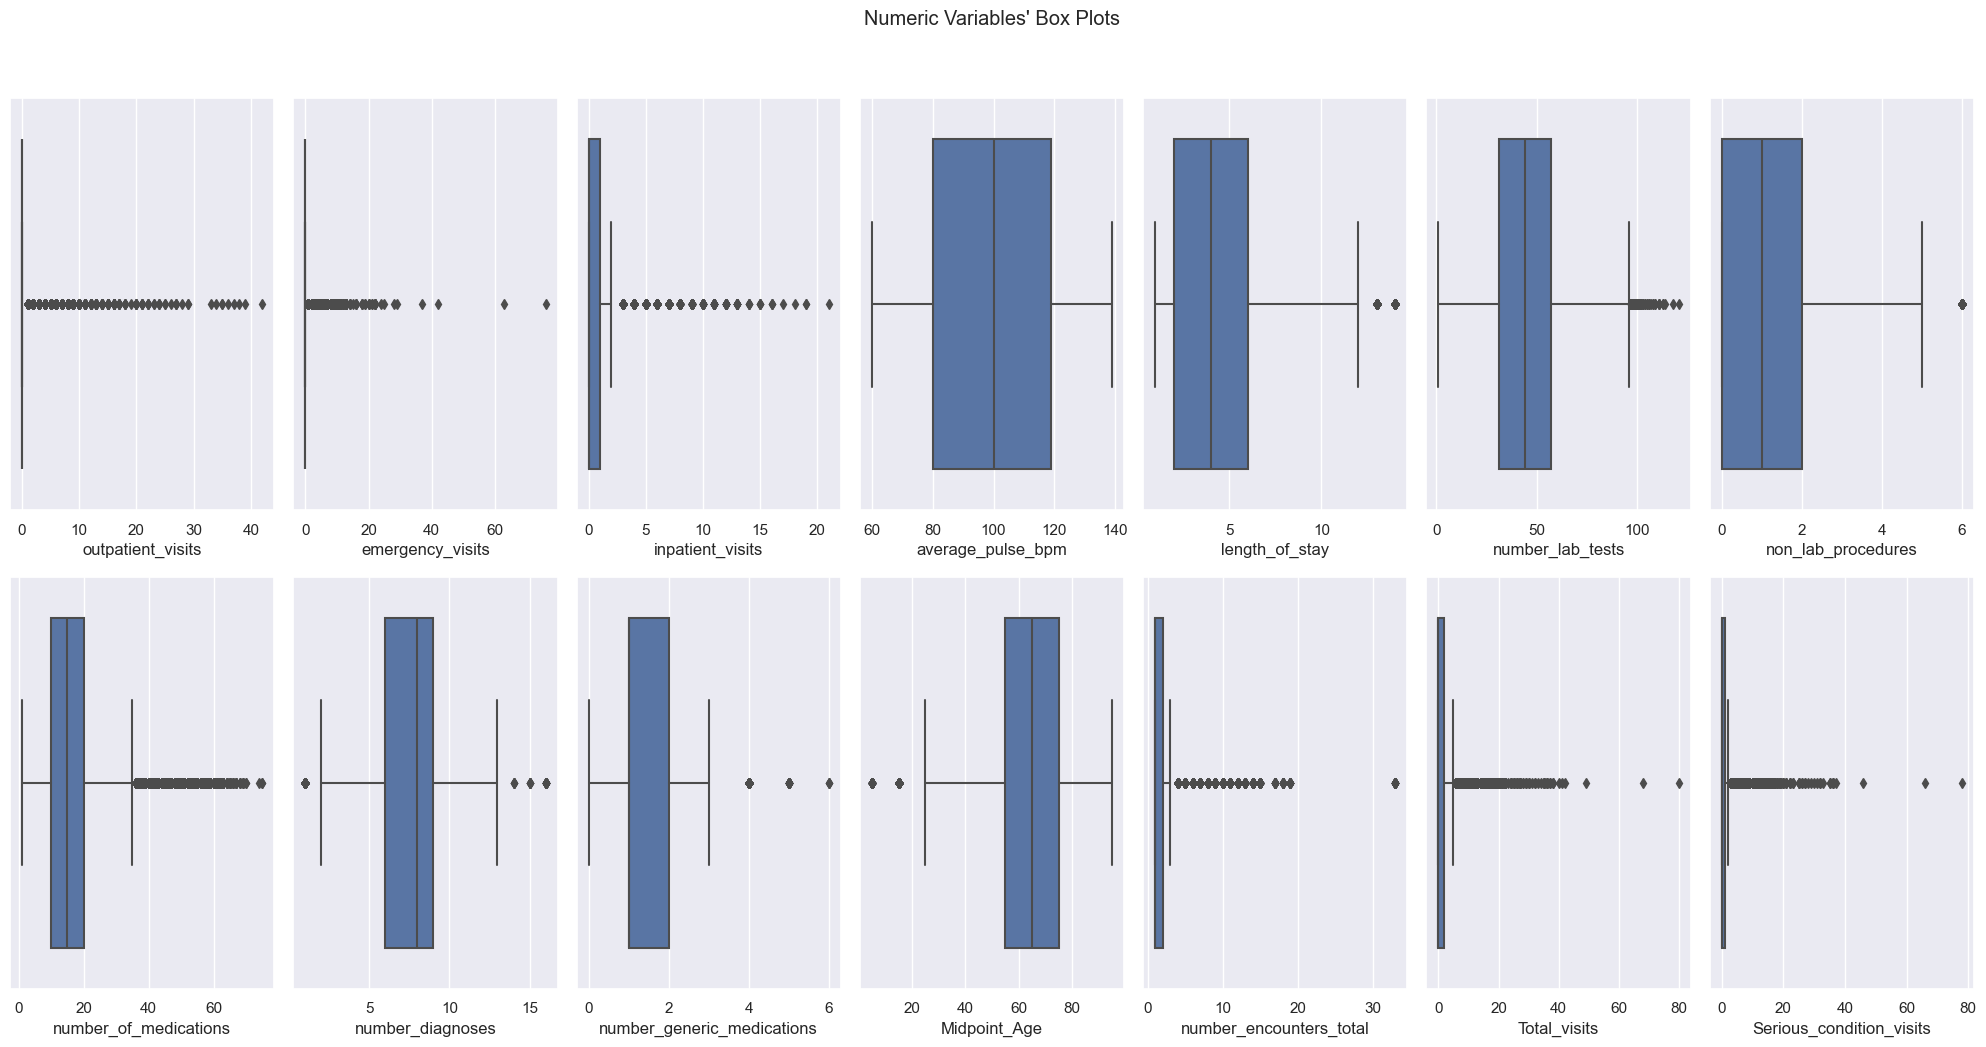

In [22]:
sns.set()

fig, axes = plt.subplots(2, ceil(len(metric_features.columns) / 2), figsize=(20, 11))
axes = axes.flatten()

for ax, feat in zip(axes, metric_features.columns):  
    sns.boxplot(x=metric_features[feat], ax=ax)  

title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Non-metrical

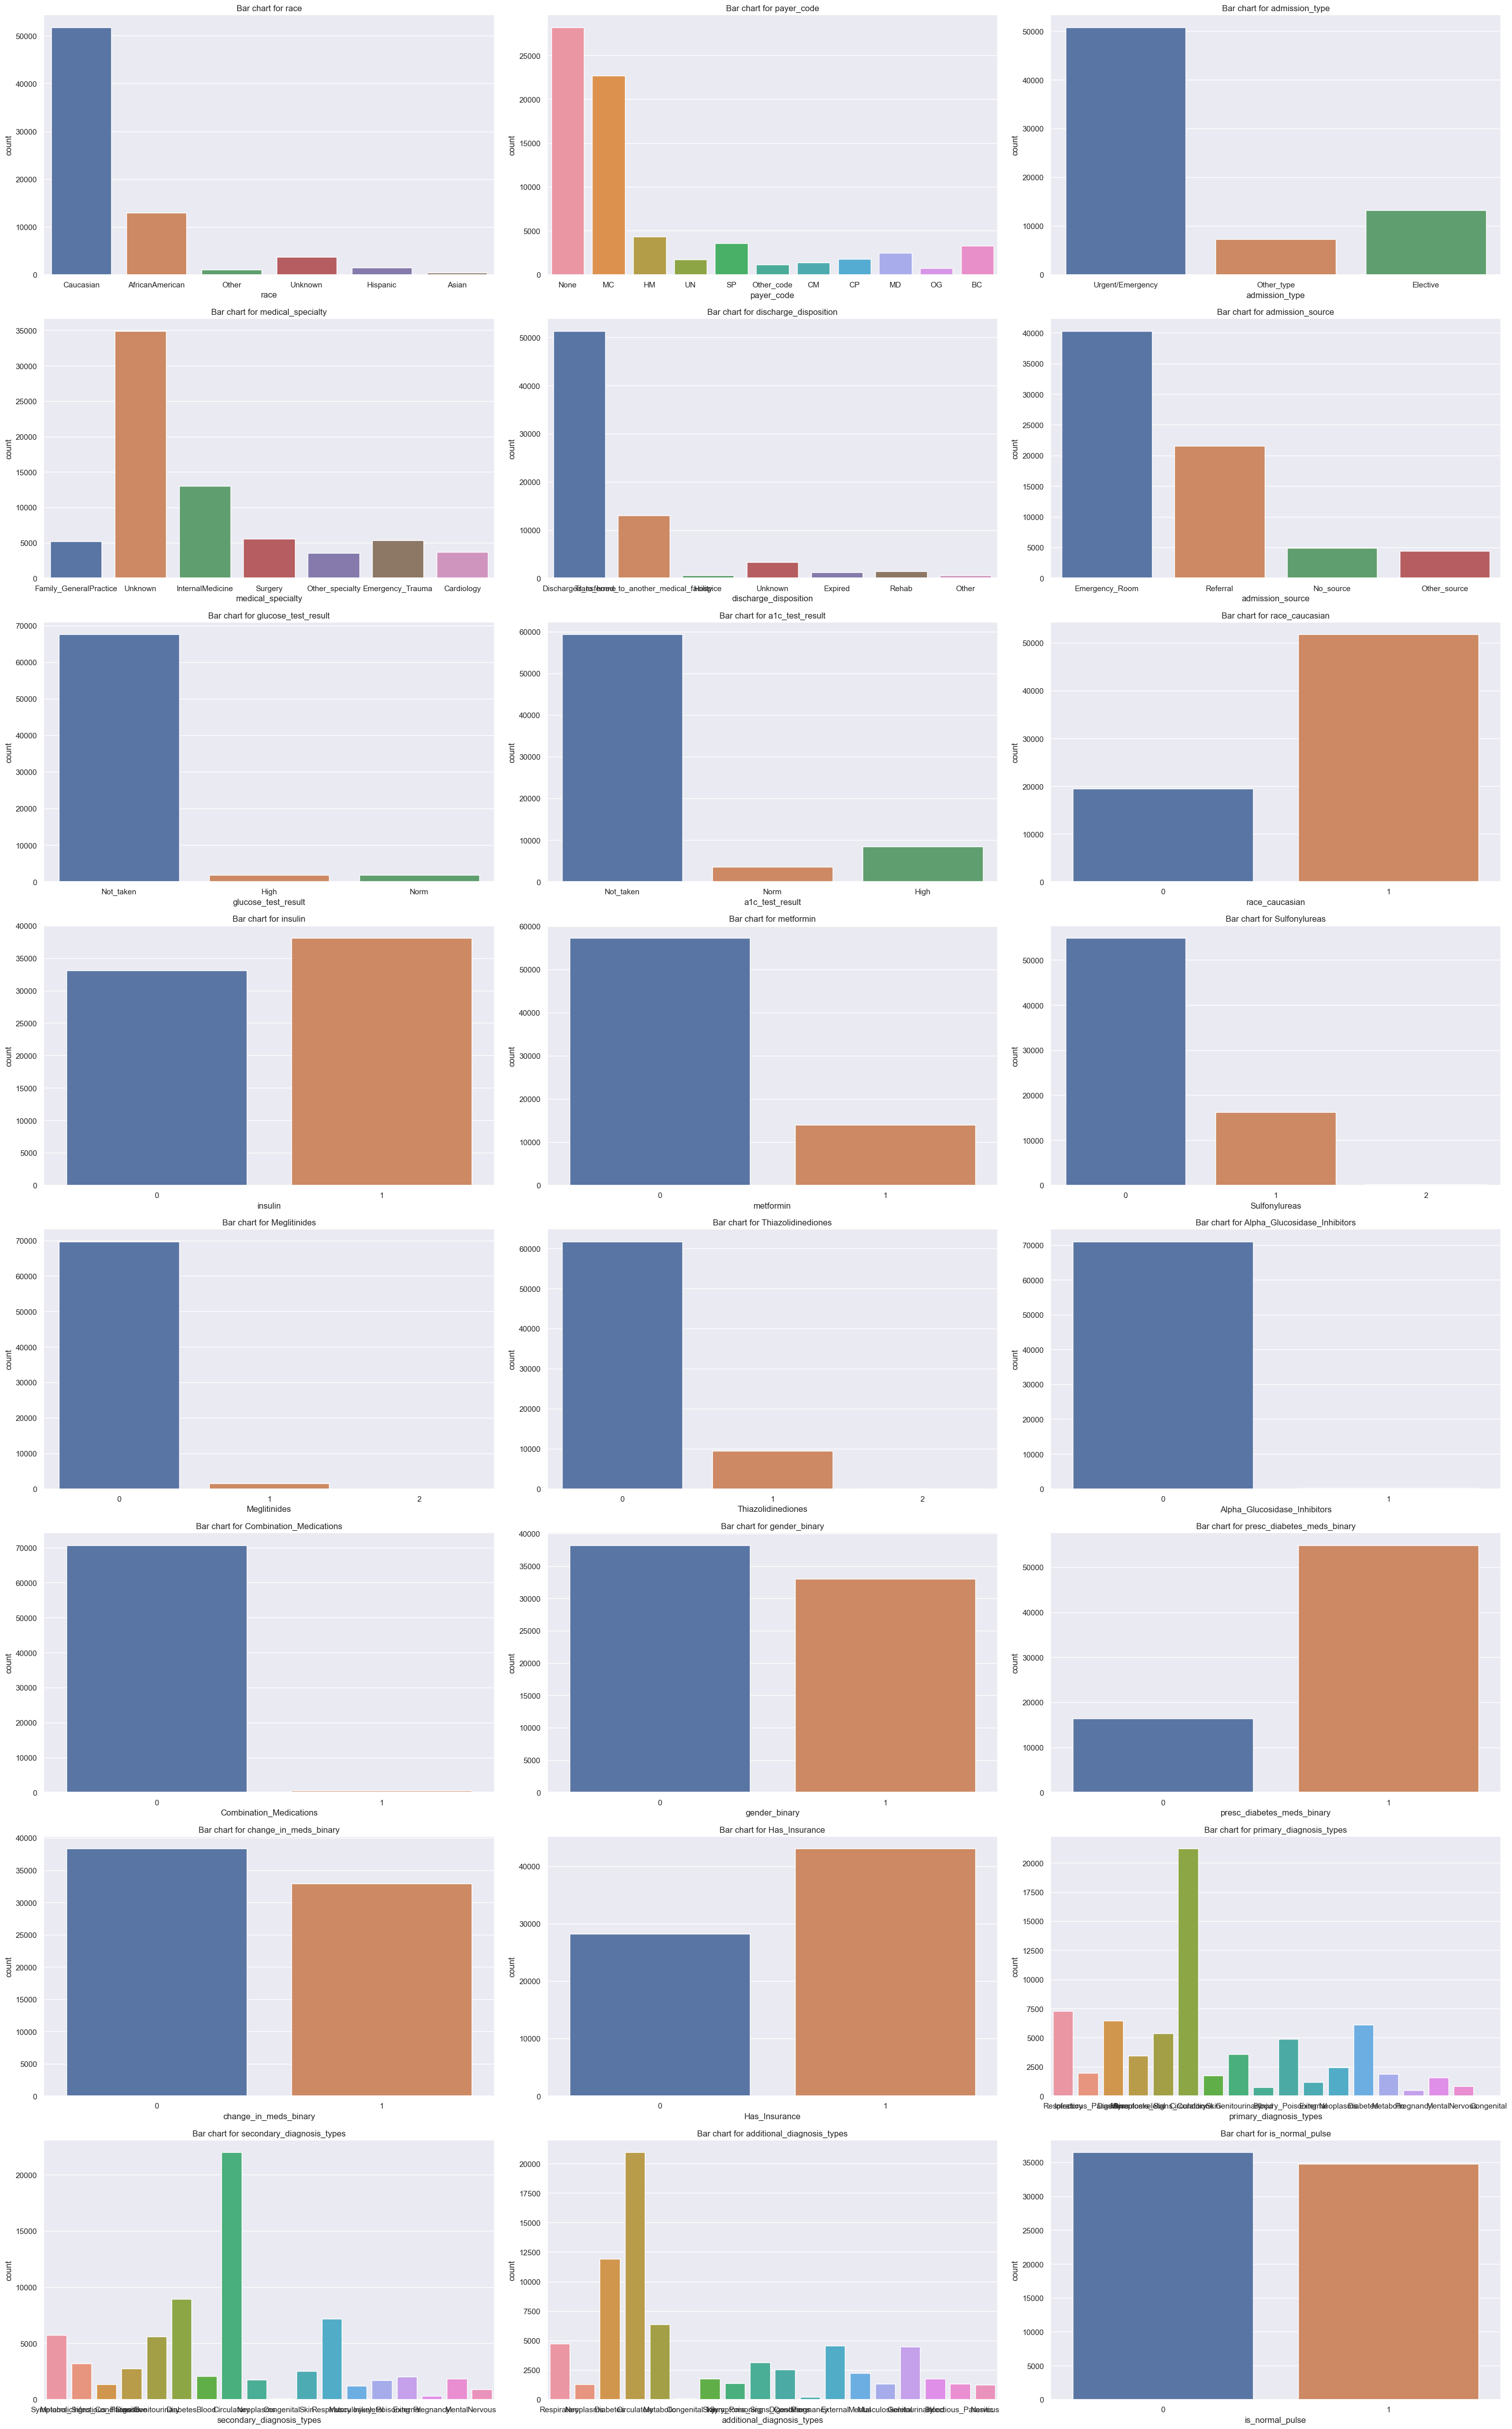

In [23]:
n_features = len(non_metric_features.columns)
n_rows = (n_features + 2) // 3
plt.figure(figsize=(30, 6 * n_rows)) 

for i, feature in enumerate(non_metric_features.columns):
    plt.subplot(n_rows, 3, i+1)  
    sns.countplot(x=feature, data=non_metric_features)
    plt.title(f'Bar chart for {feature}')

plt.tight_layout()
plt.show()

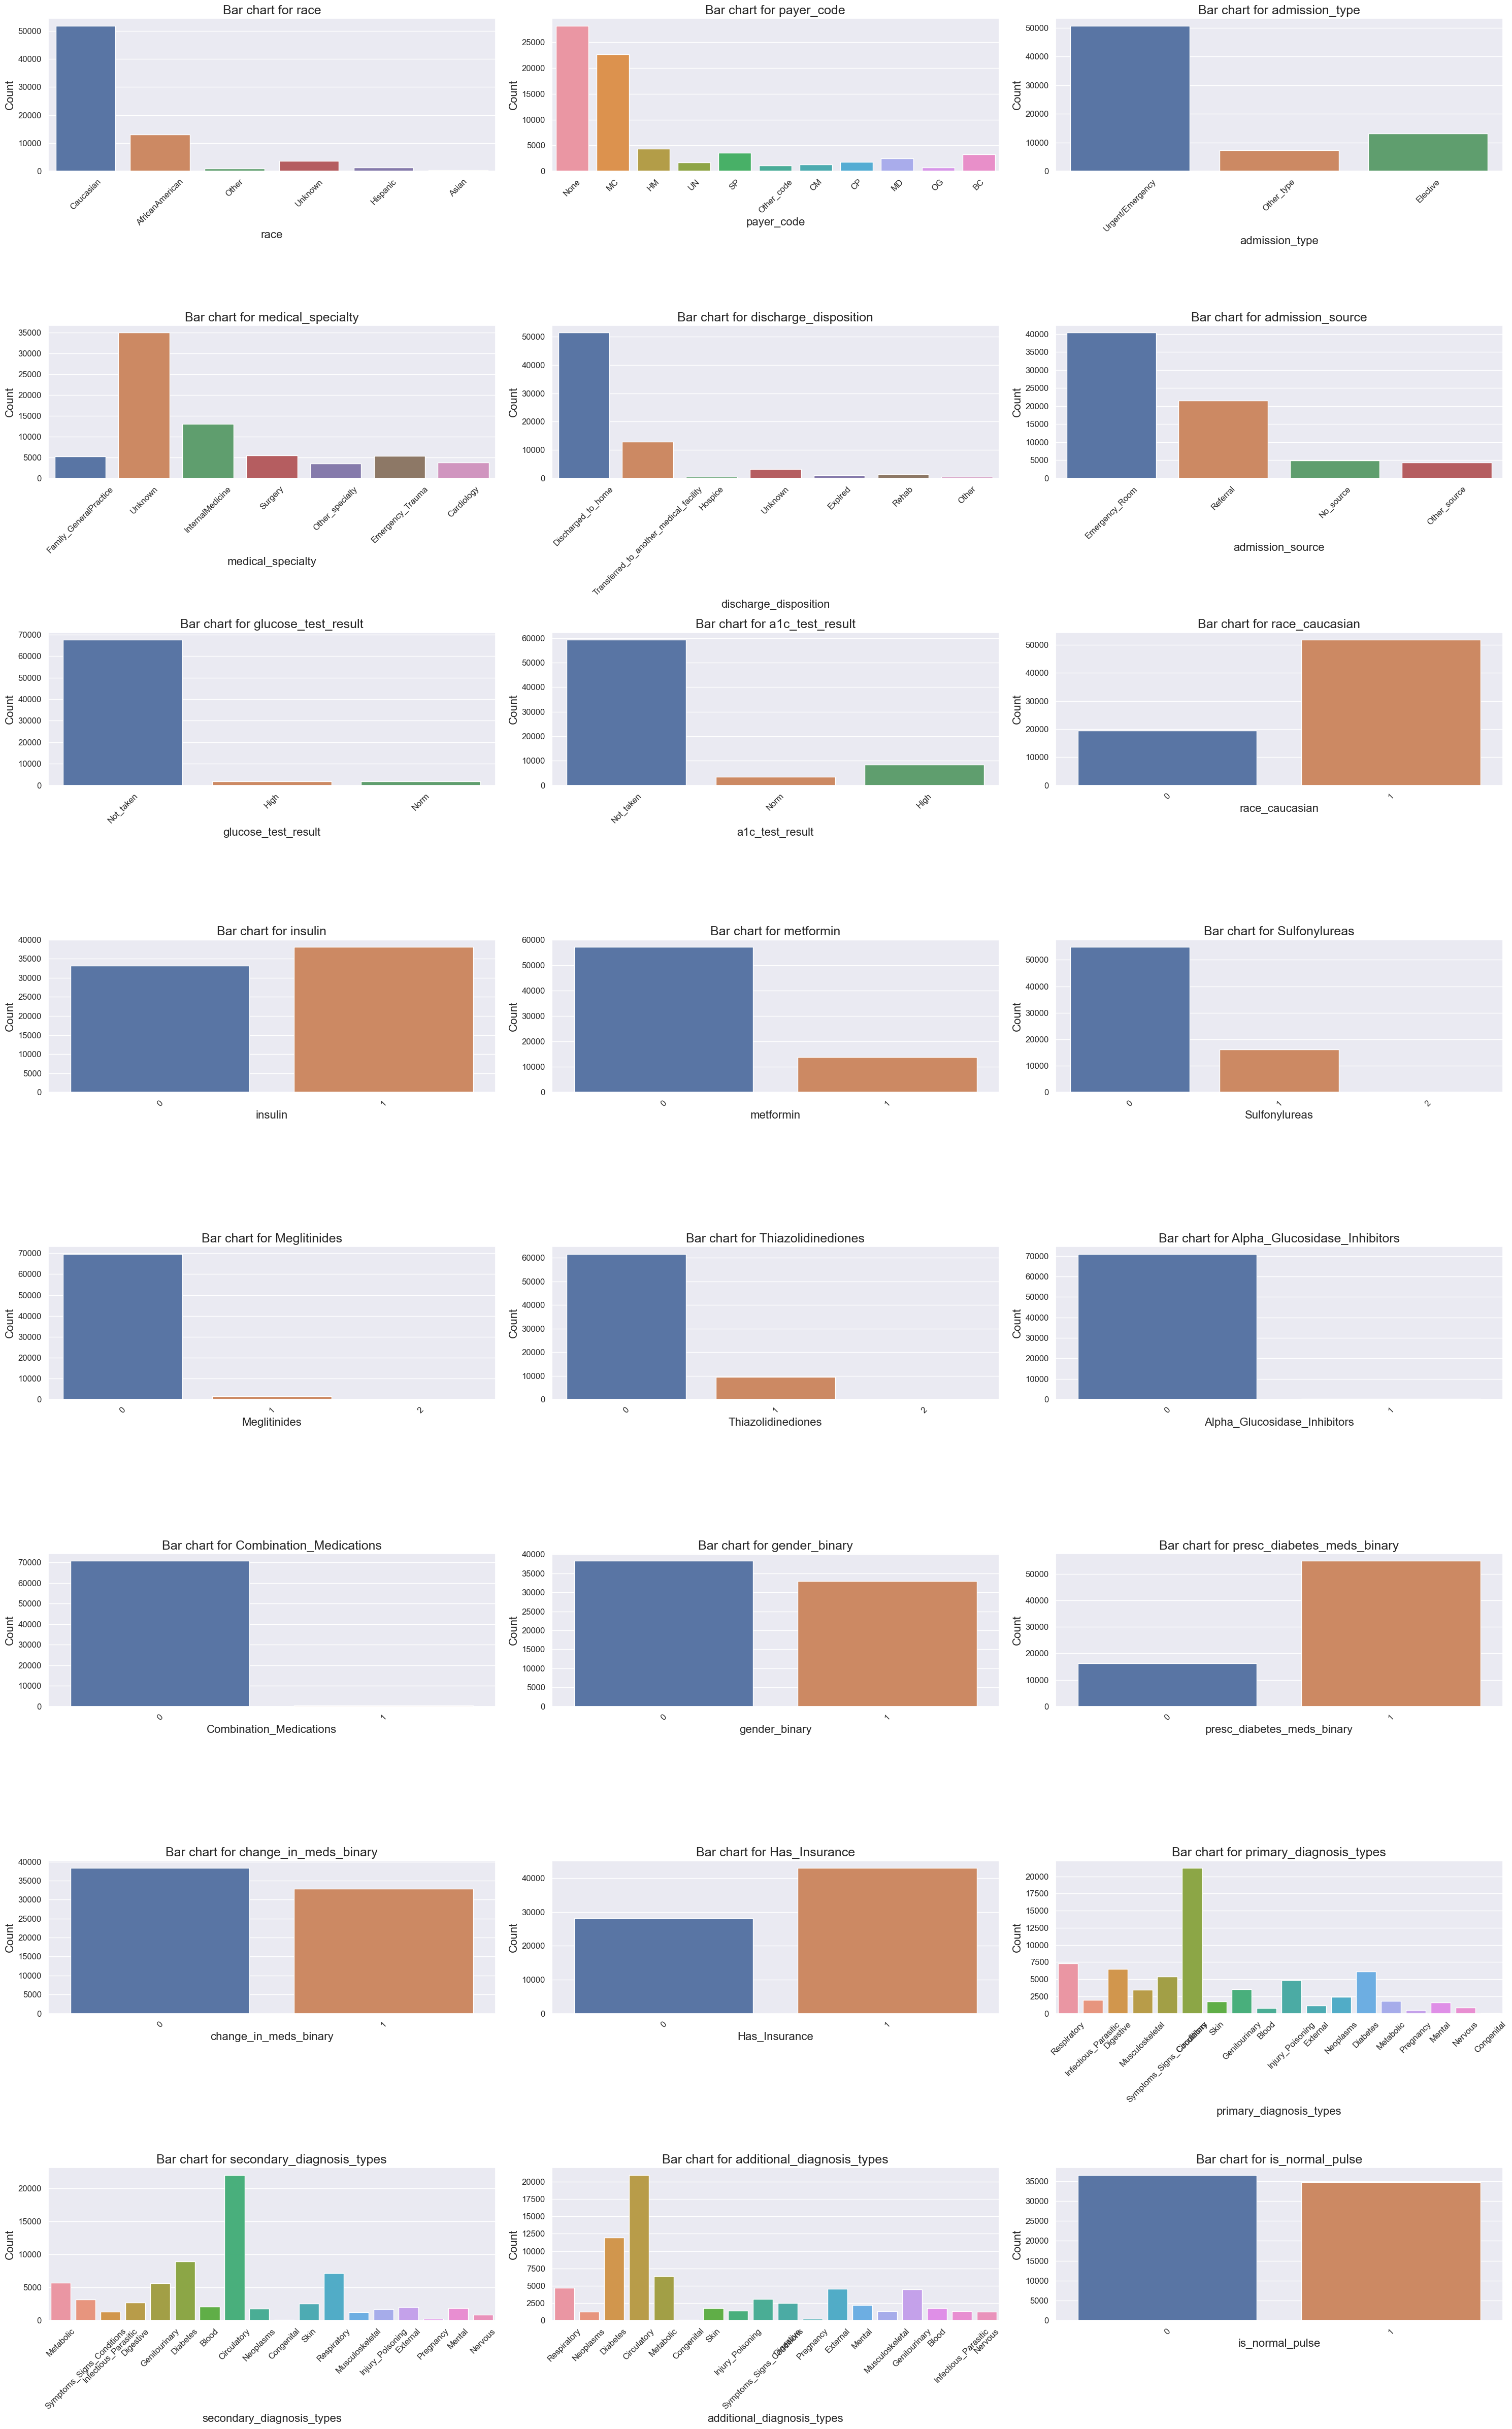

In [24]:
n_features = len(non_metric_features.columns)
n_rows = (n_features + 2) // 3 
plt.figure(figsize=(30, 6 * n_rows))

# Sets larger font size for titles and labels
plt.rc('axes', titlesize=18)    
plt.rc('axes', labelsize=14)   
plt.rc('xtick', labelsize=12)   
plt.rc('ytick', labelsize=12)   

for i, feature in enumerate(non_metric_features.columns):
    plt.subplot(n_rows, 3, i+1)  
    ax = sns.countplot(x=feature, data=non_metric_features)
    ax.set_title(f'Bar chart for {feature}')
    ax.set_xlabel(feature, fontsize=16)  
    ax.set_ylabel('Count', fontsize=16)  
    
    for item in ax.get_xticklabels():
        item.set_rotation(45)

plt.tight_layout()
plt.show()

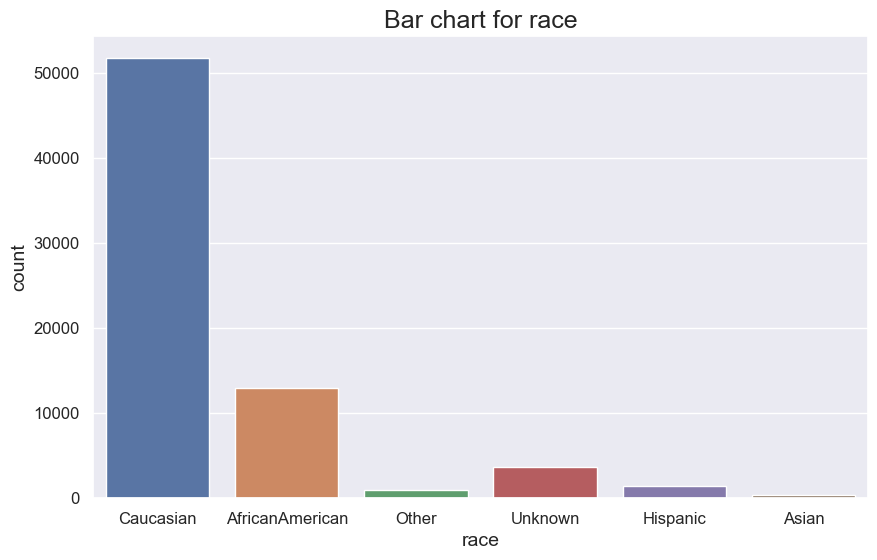

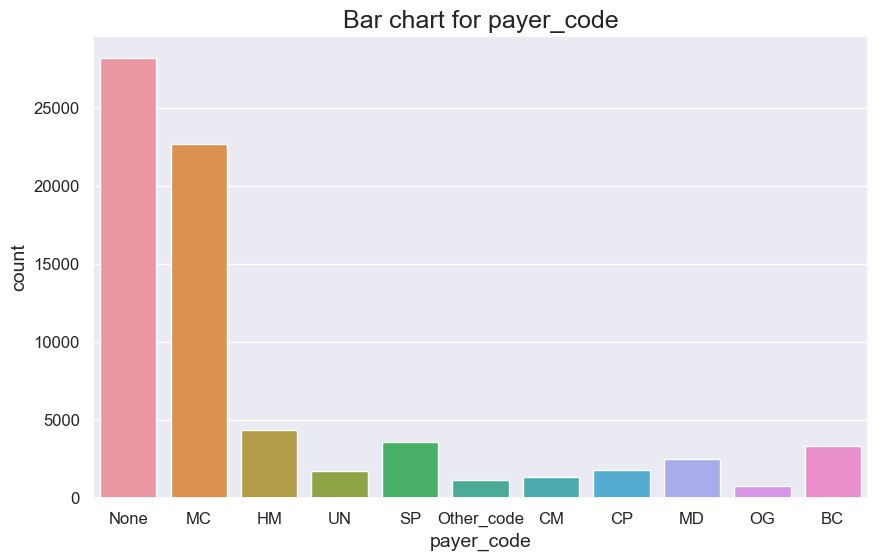

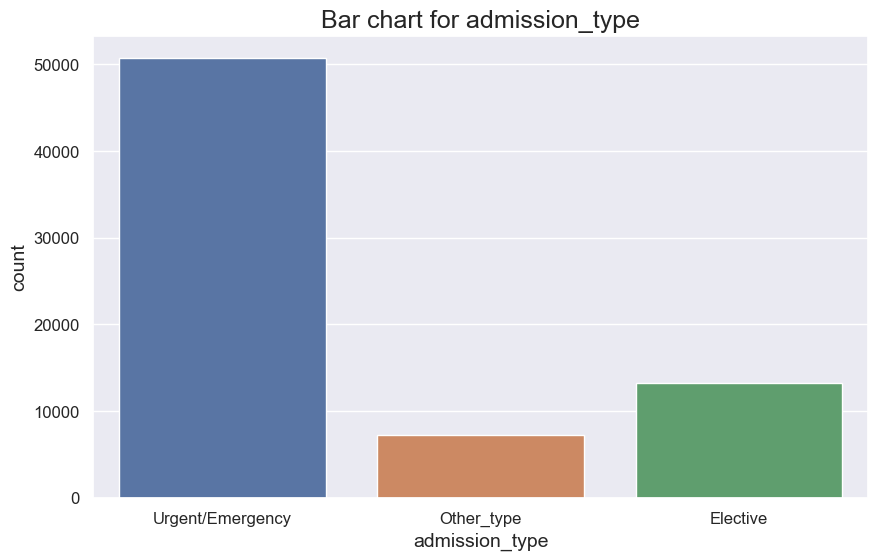

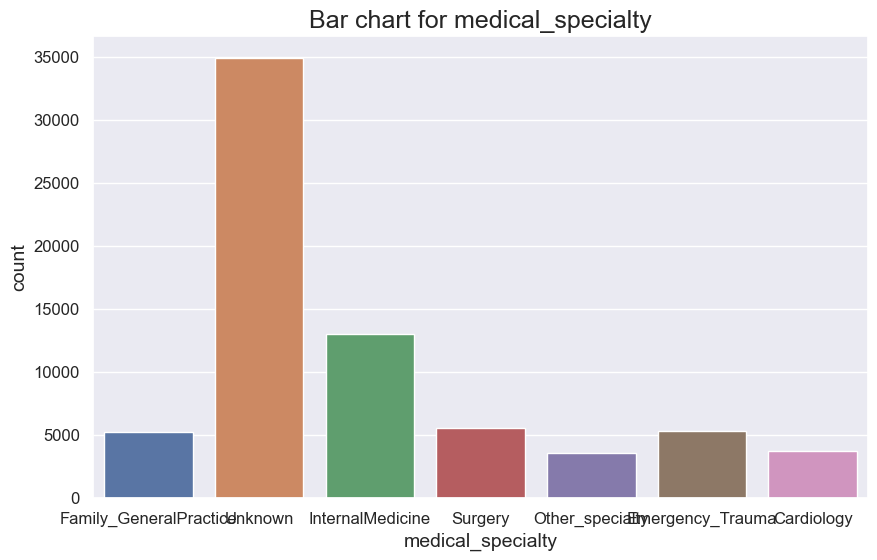

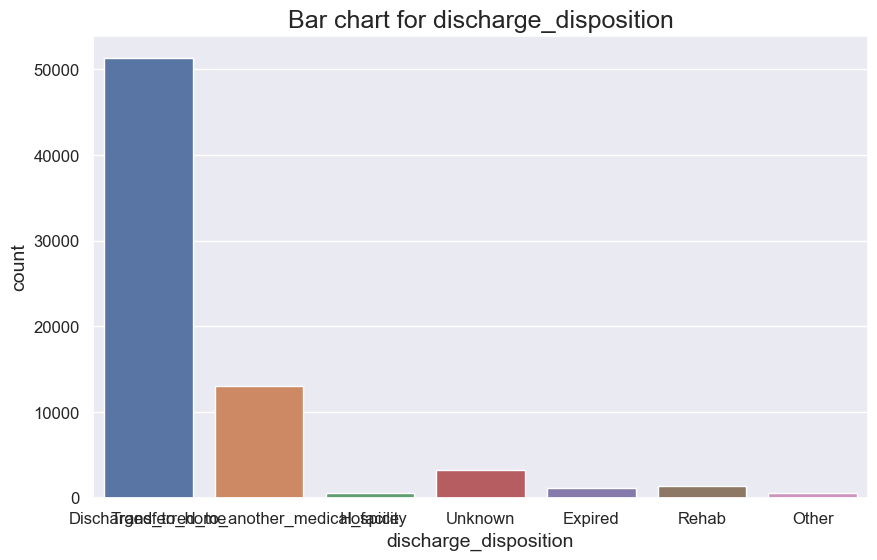

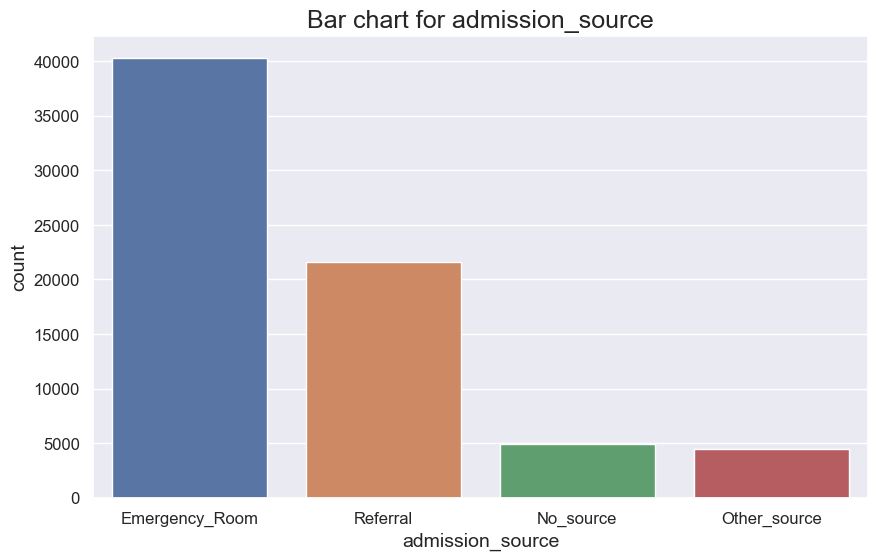

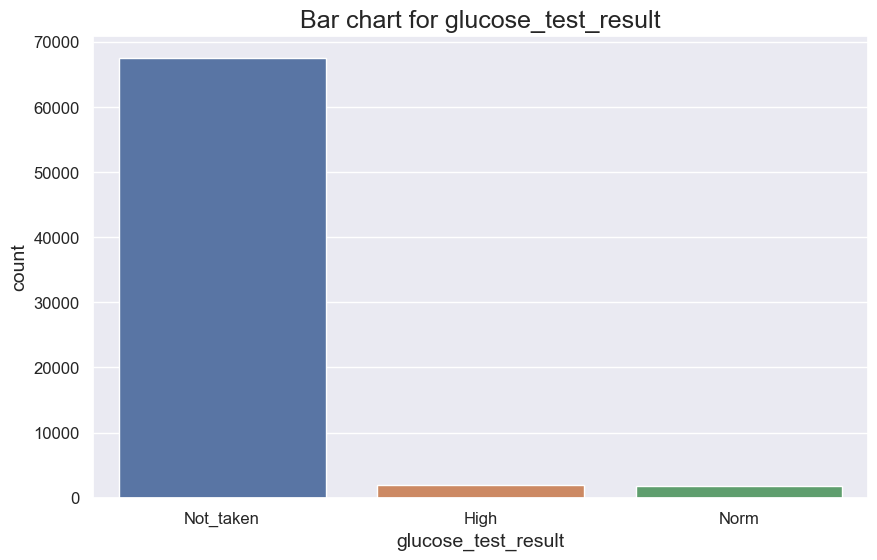

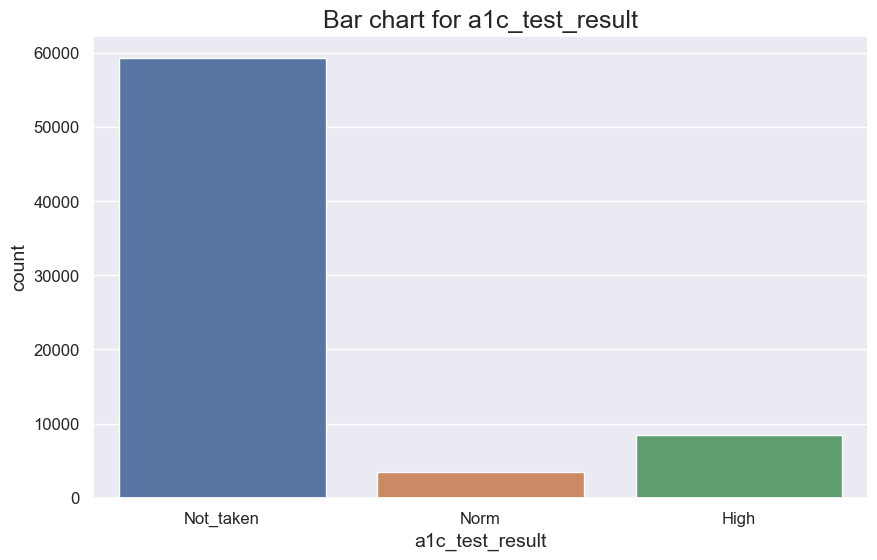

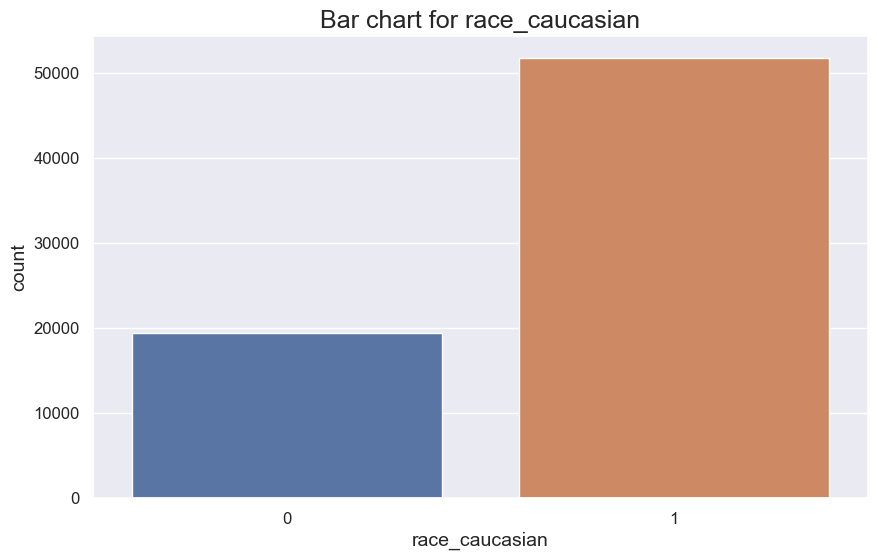

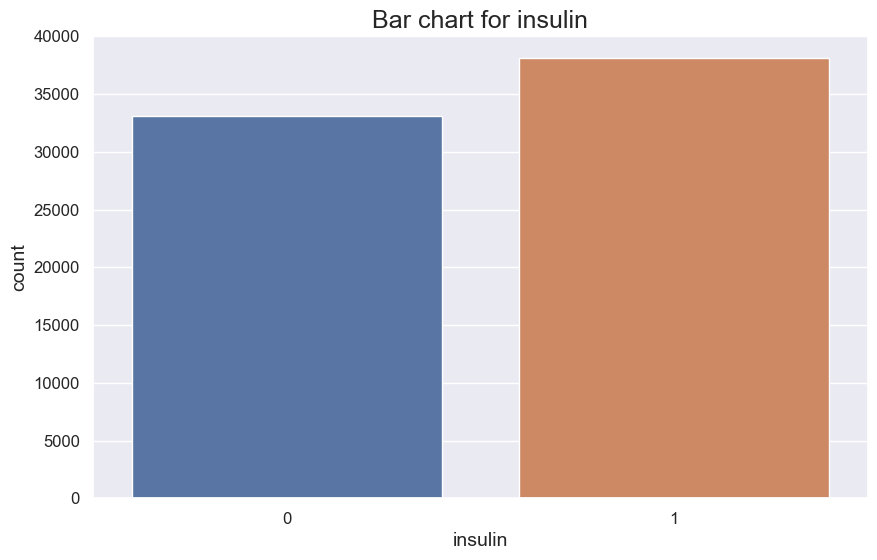

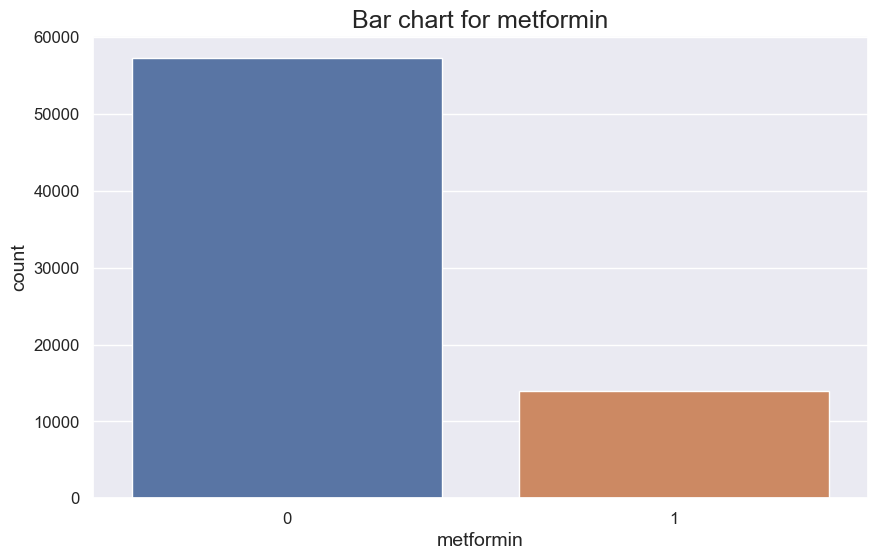

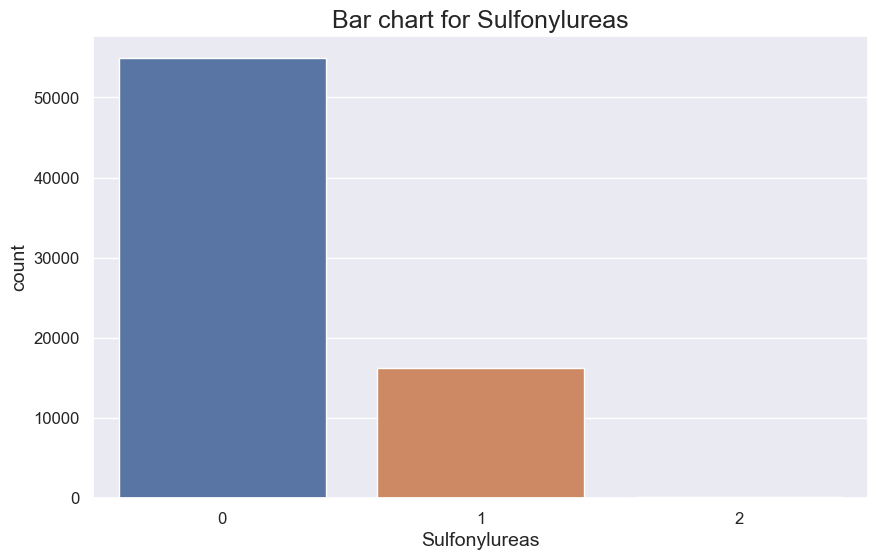

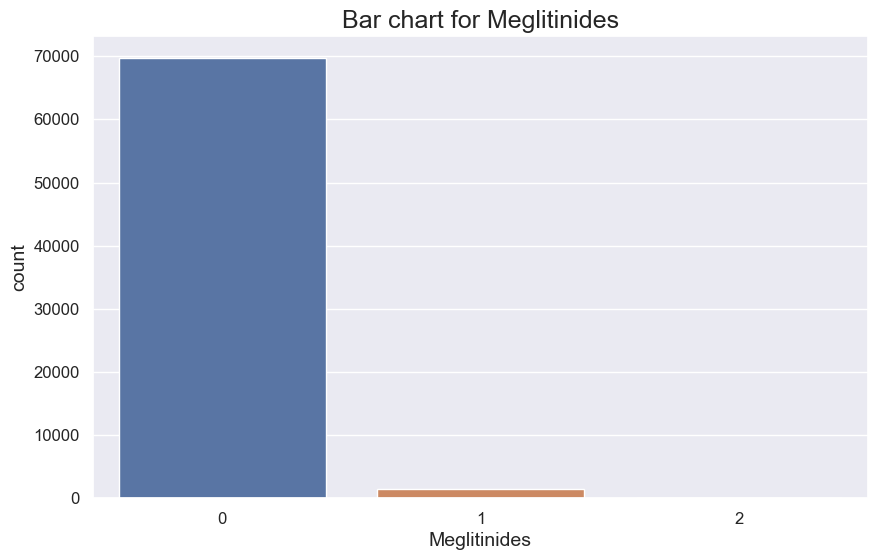

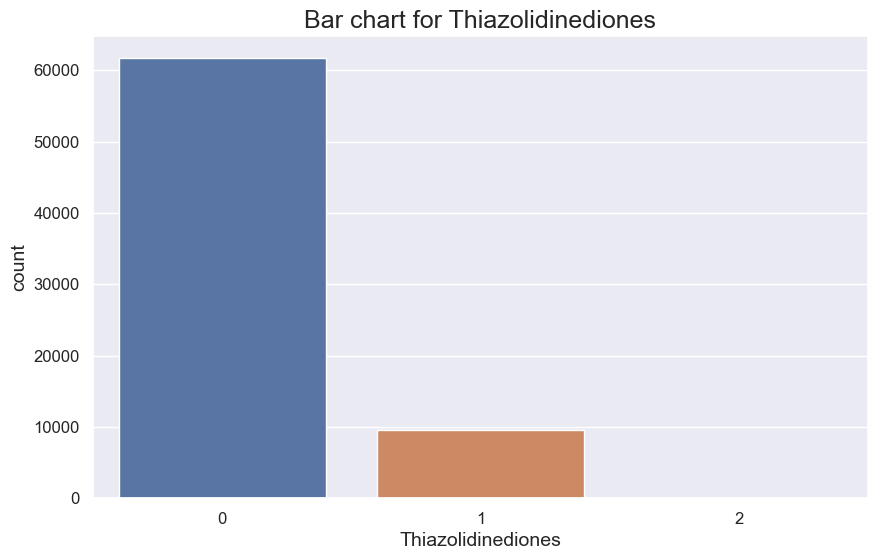

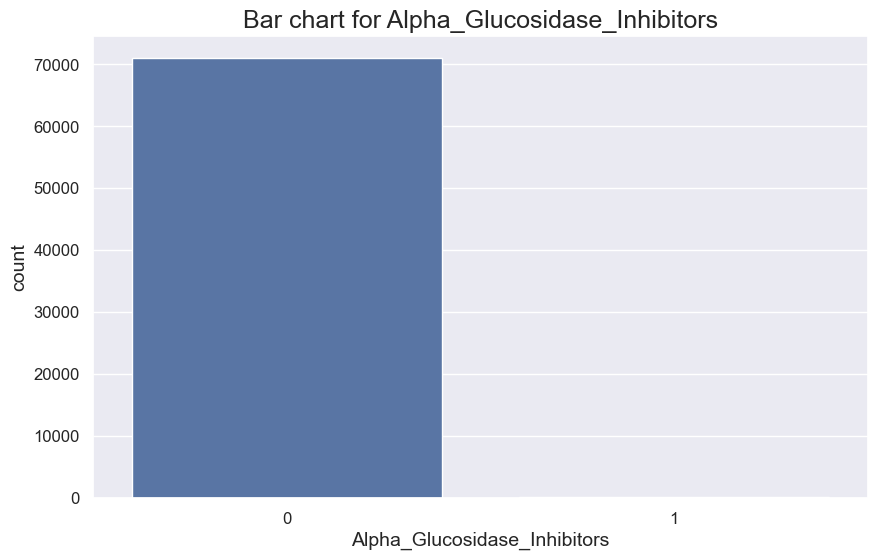

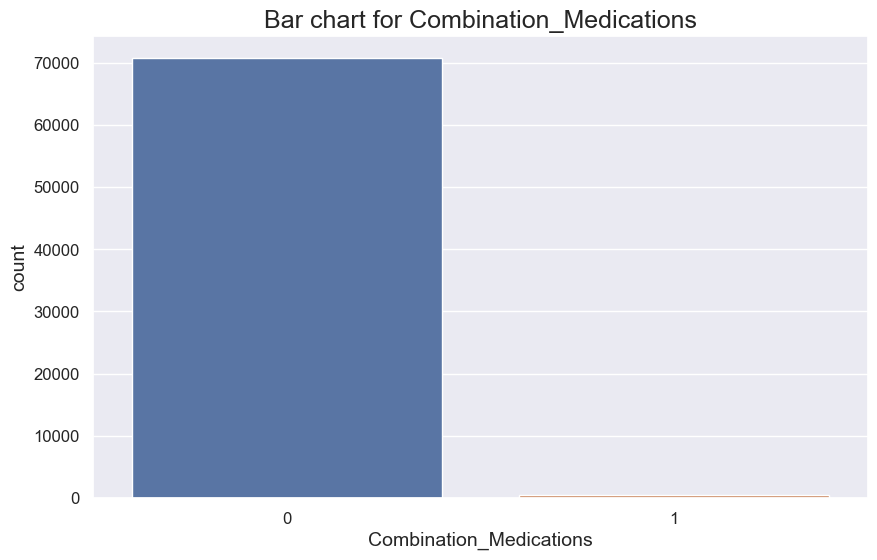

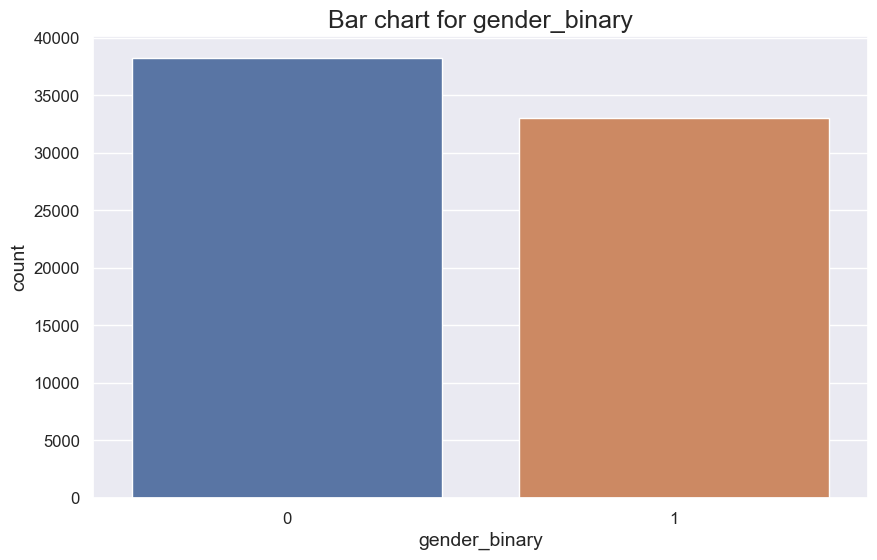

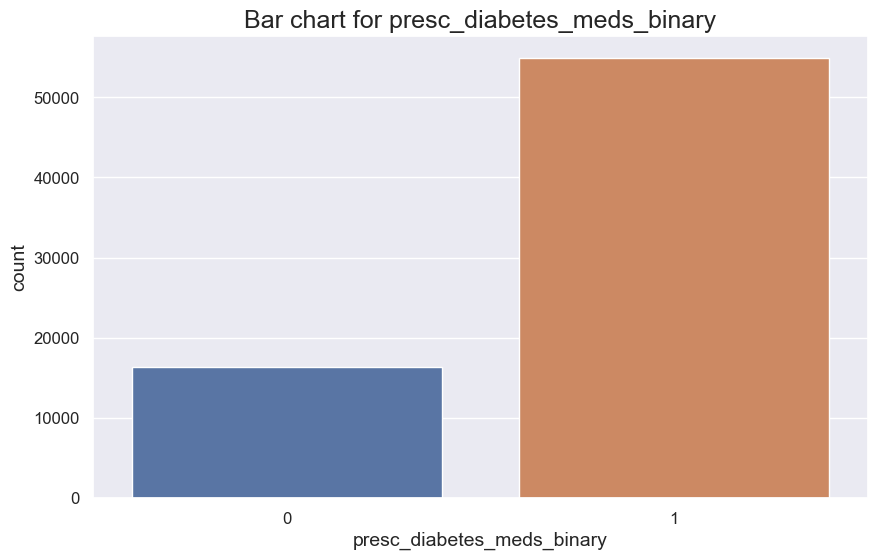

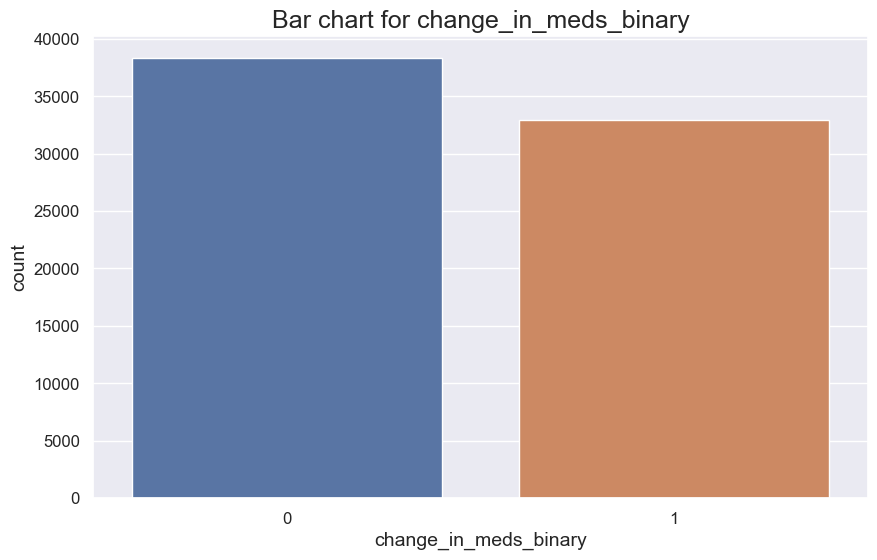

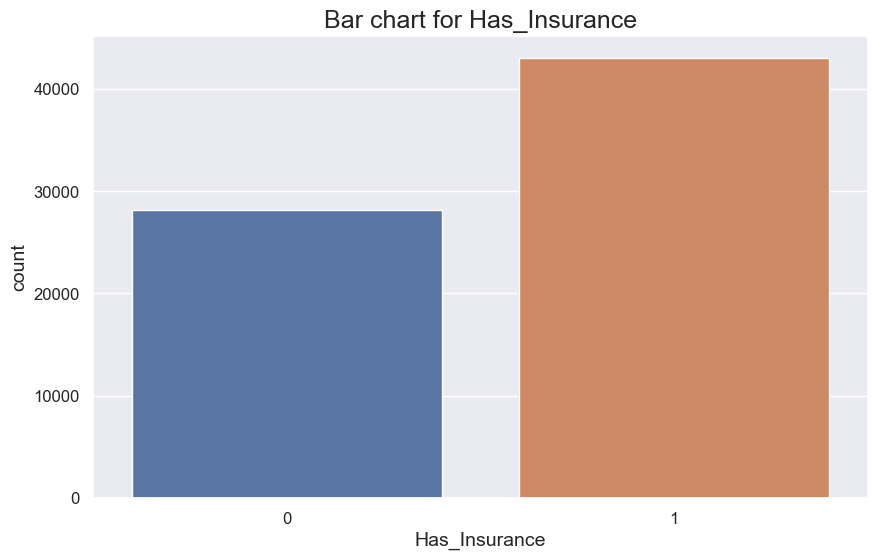

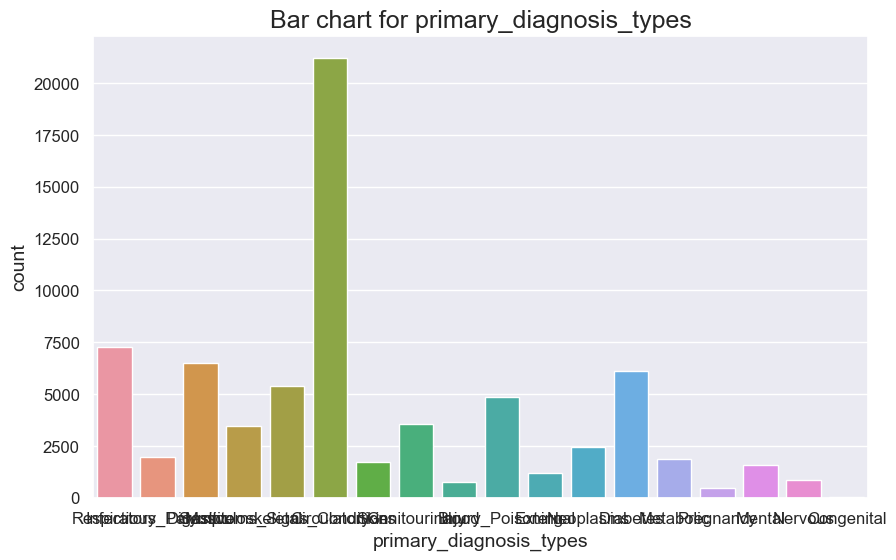

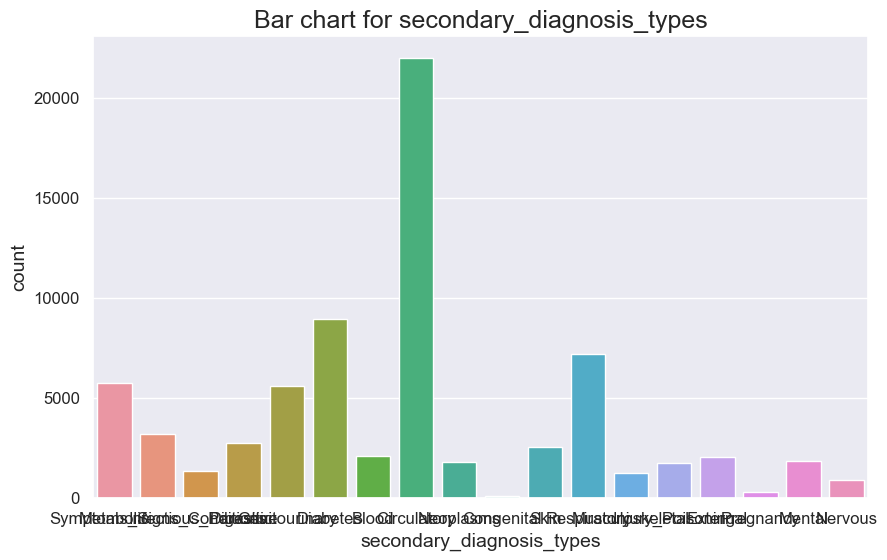

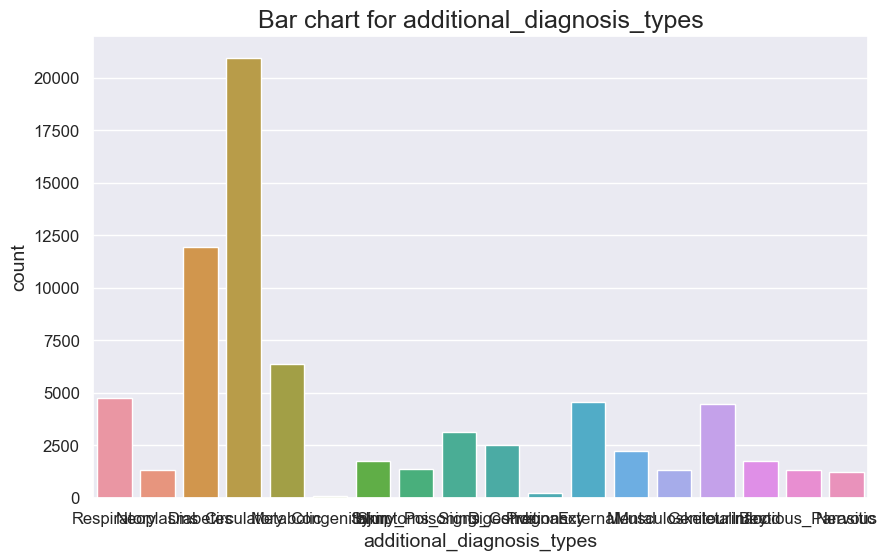

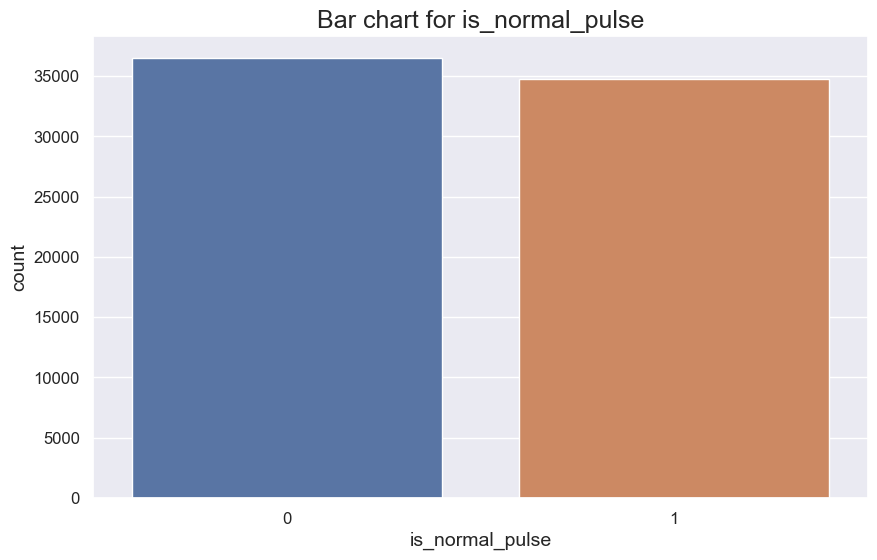

In [25]:
for feature in non_metric_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=non_metric_features)
    plt.title(f'Bar chart for {feature}')
    plt.show()

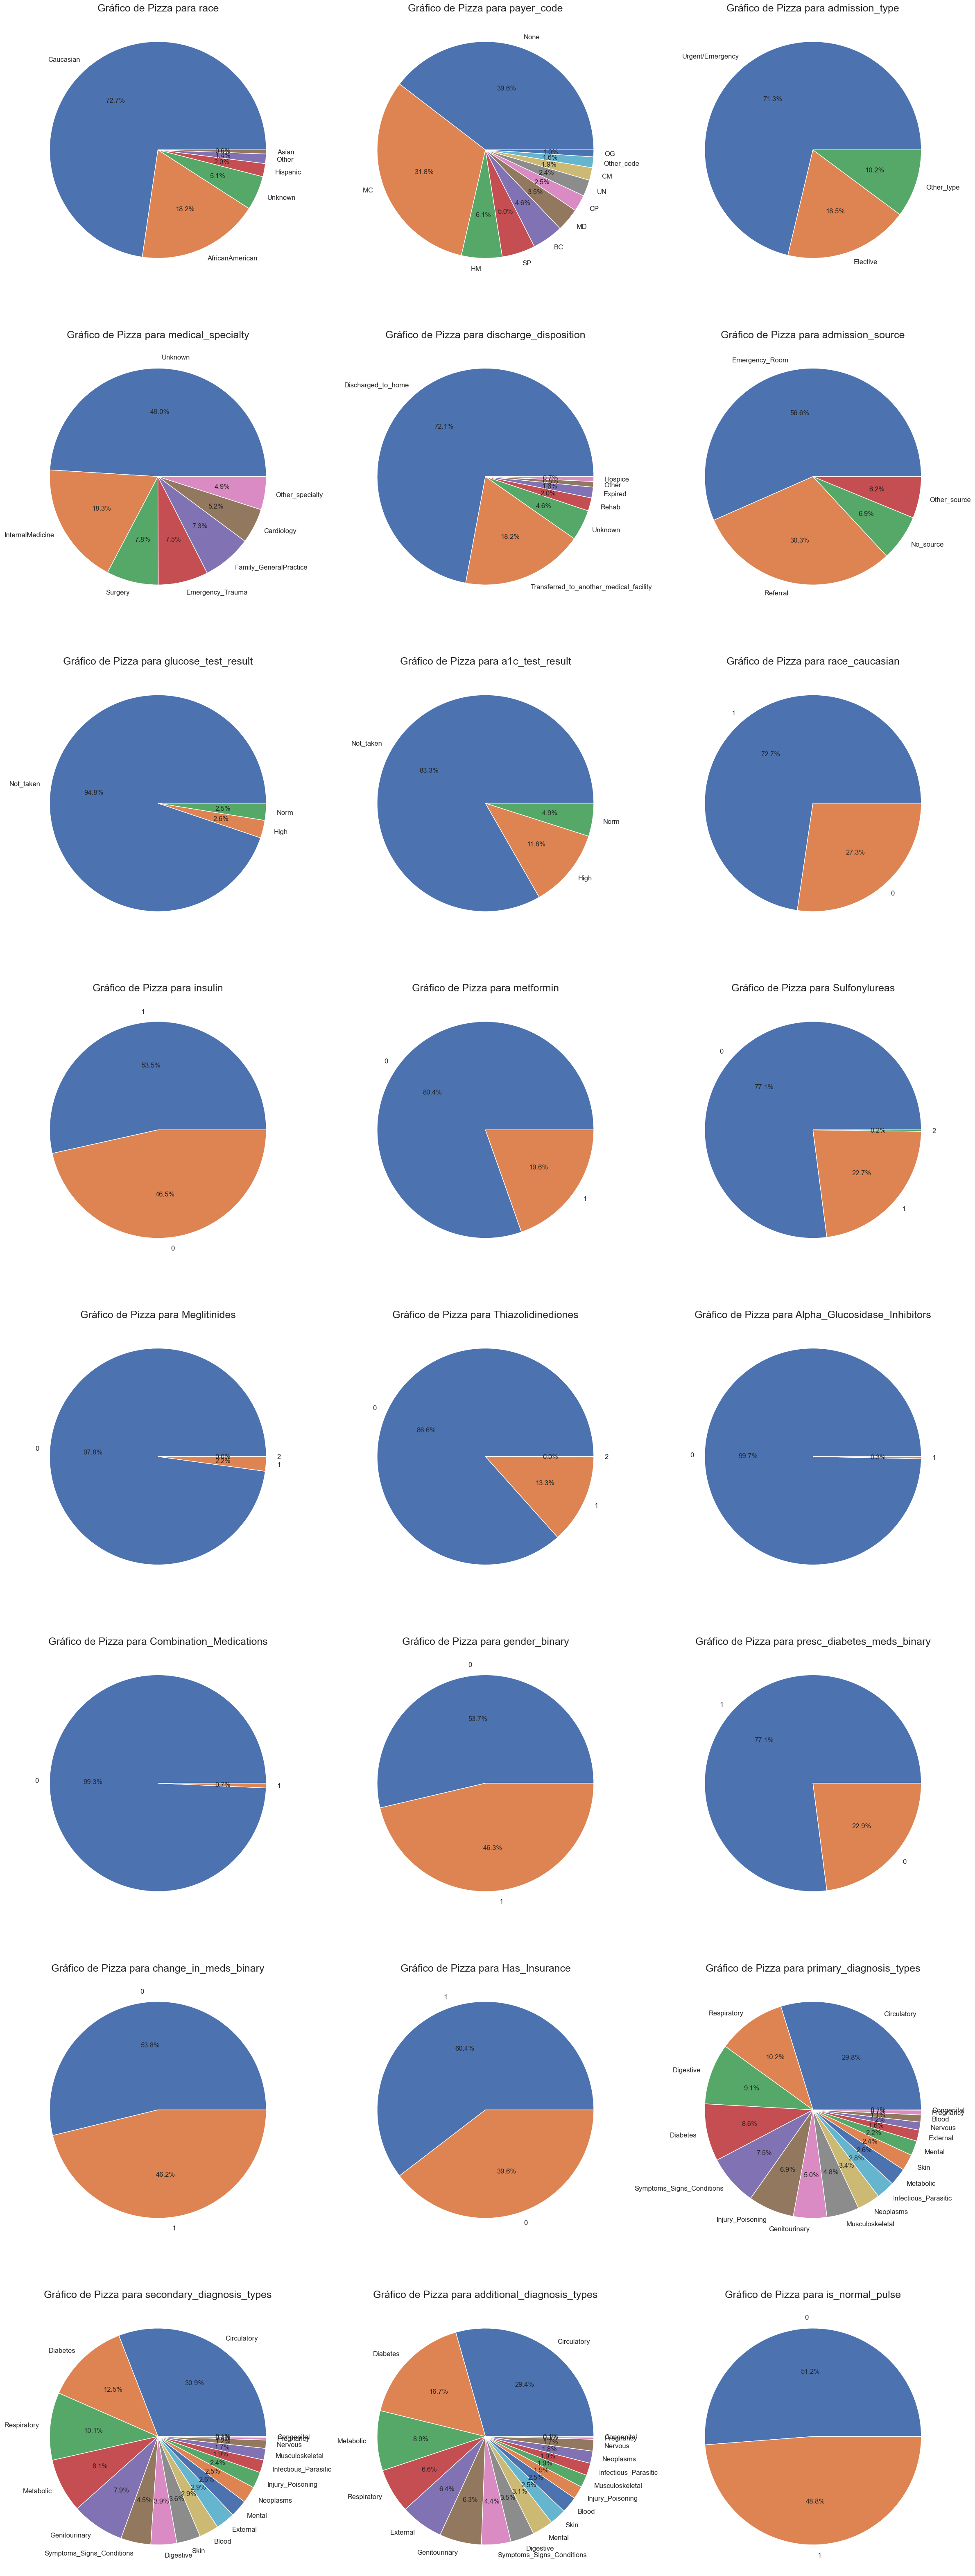

In [26]:
n_features = len(non_metric_features.columns)
n_rows = (n_features + 2) // 3 

fig, axes = plt.subplots(n_rows, 3, figsize=(24, 8 * n_rows)) 
axes = axes.flatten() 

for i, feature in enumerate(non_metric_features.columns):
    non_metric_features[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(f'Gráfico de Pizza para {feature}')
    axes[i].set_ylabel('')  

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

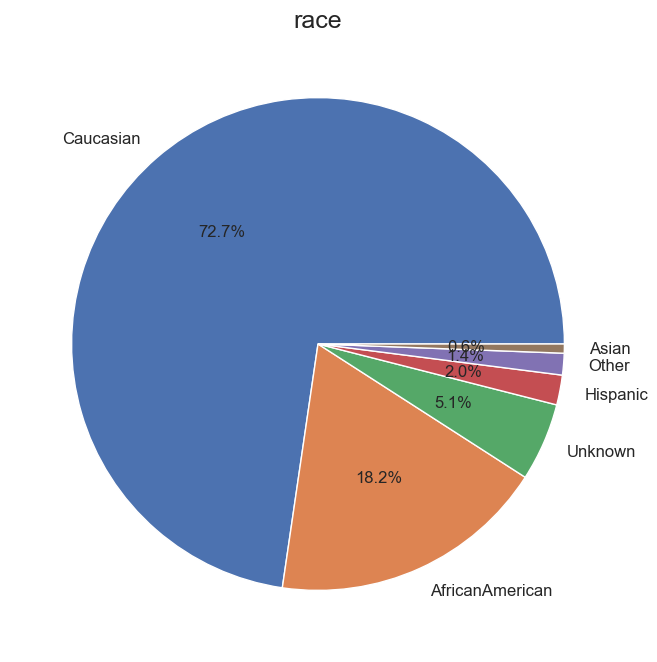

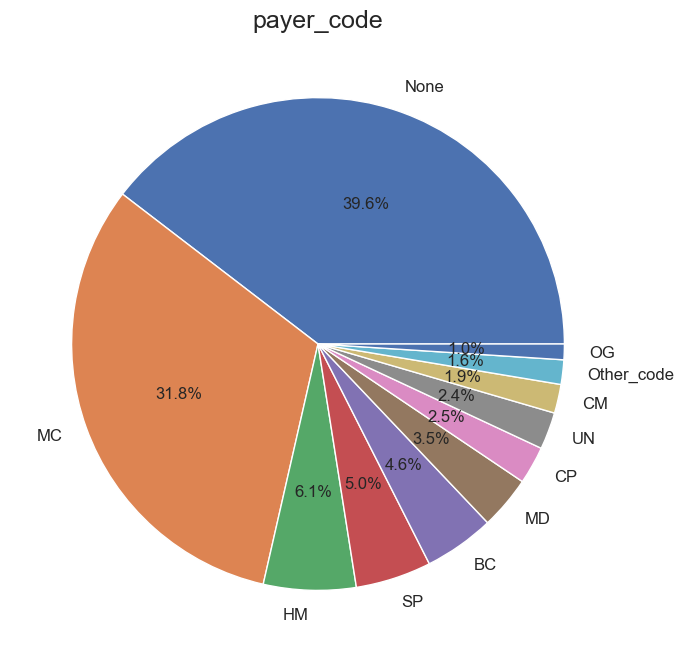

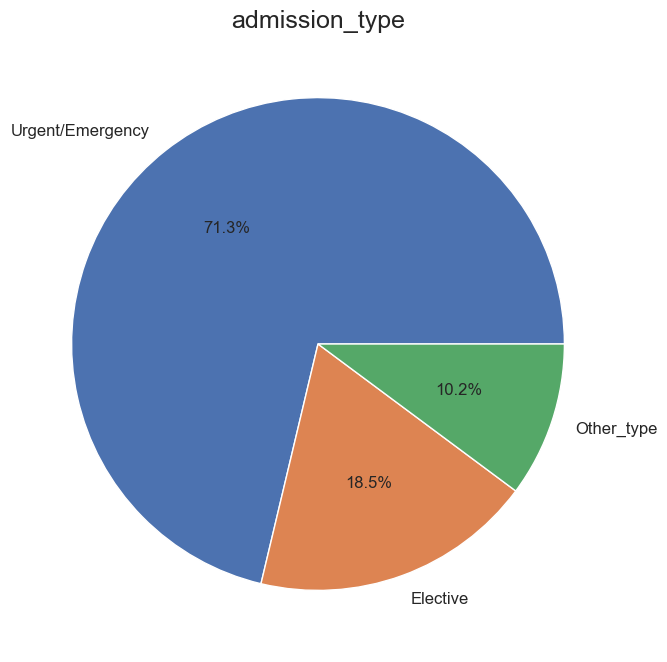

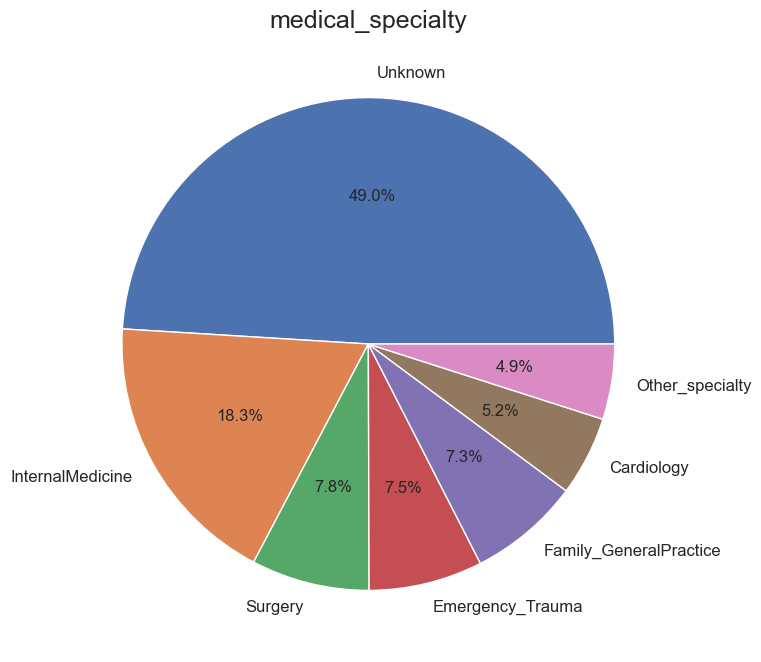

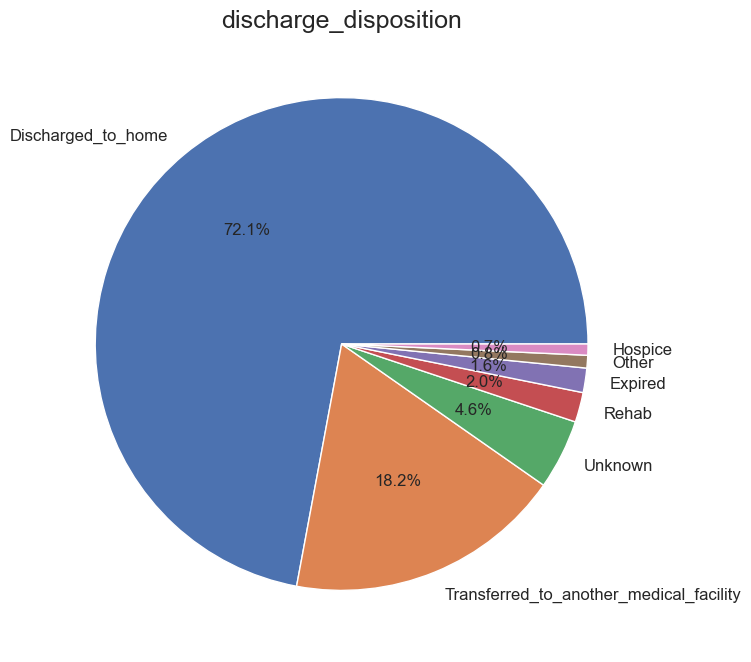

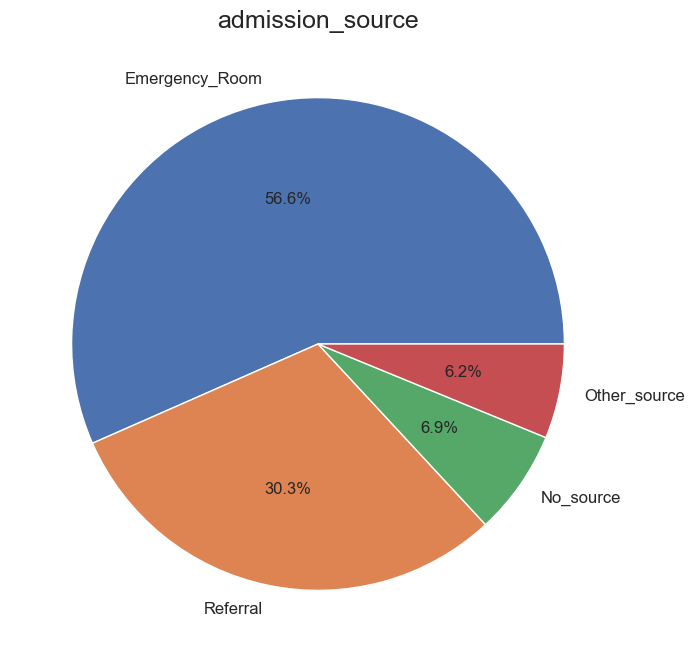

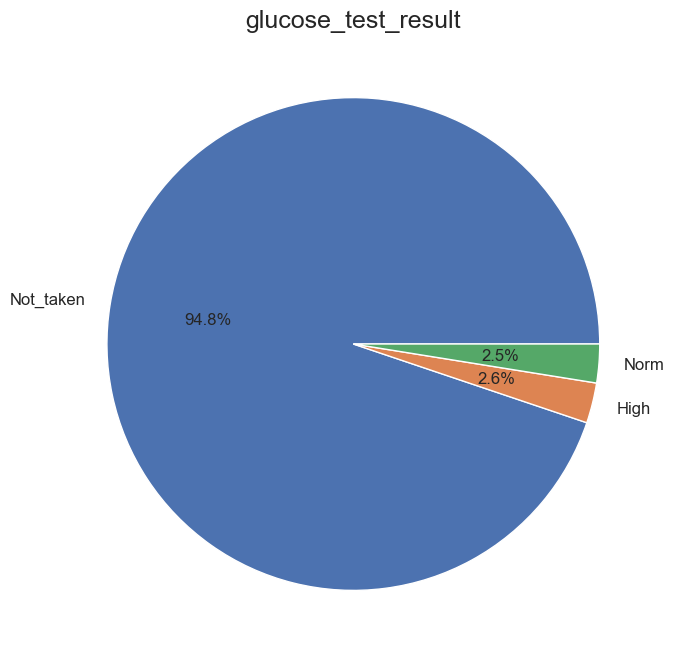

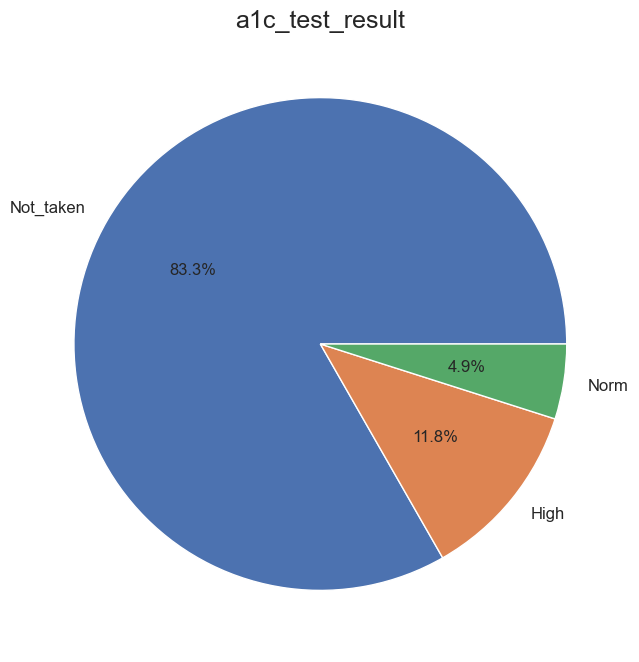

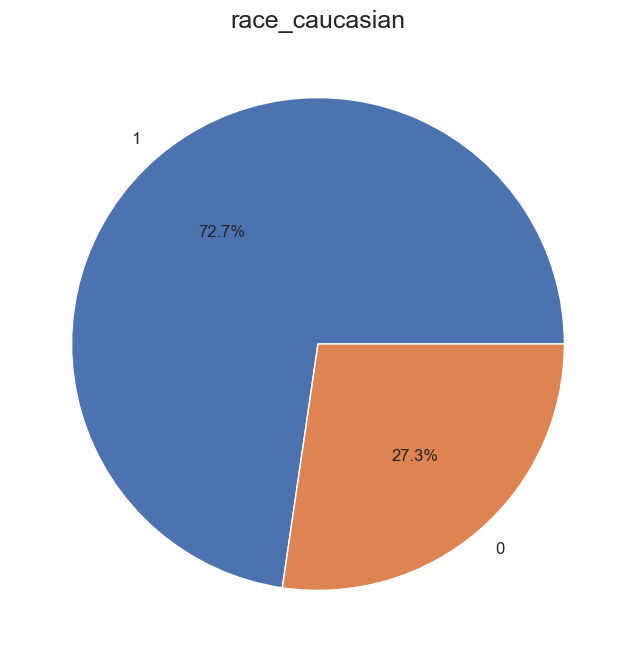

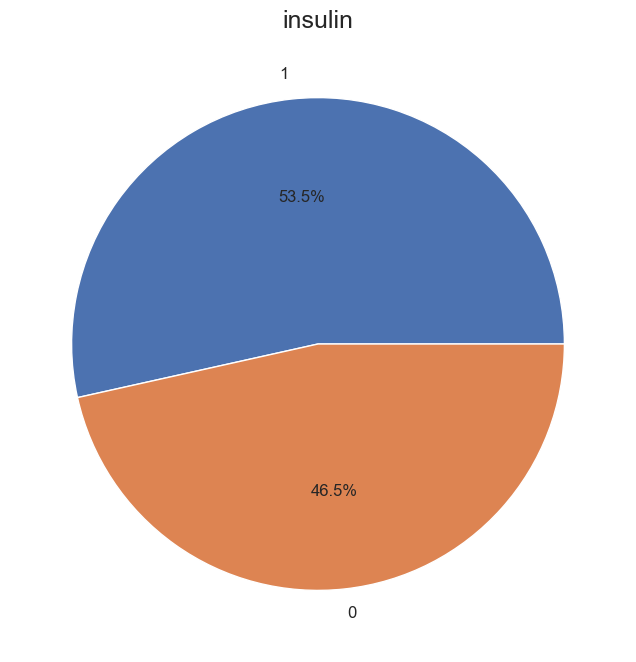

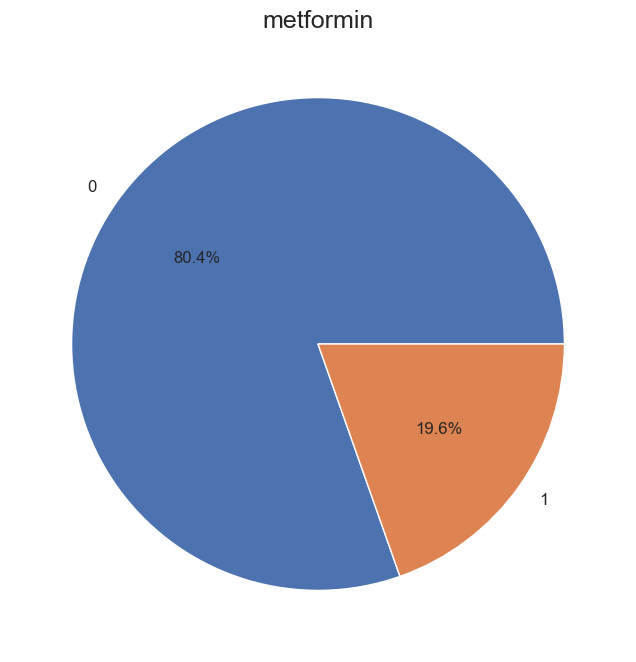

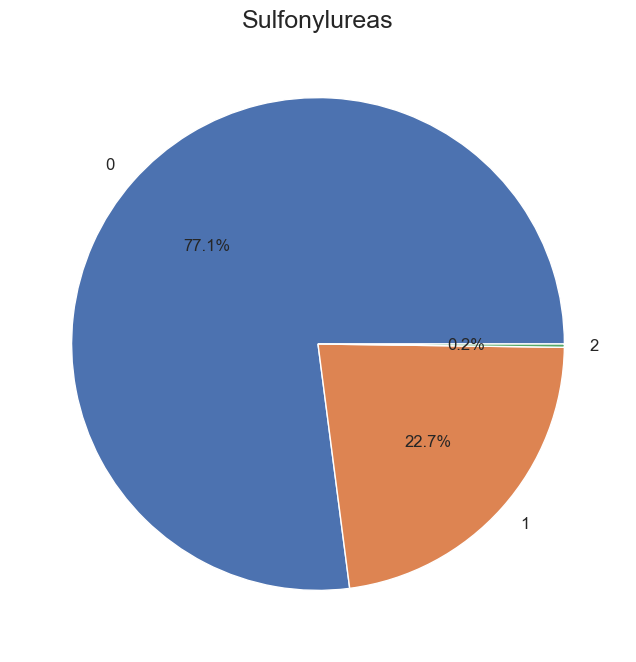

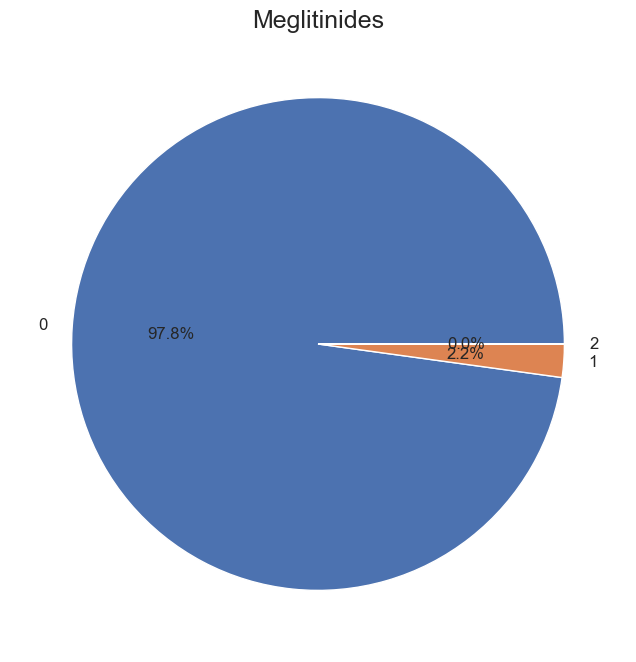

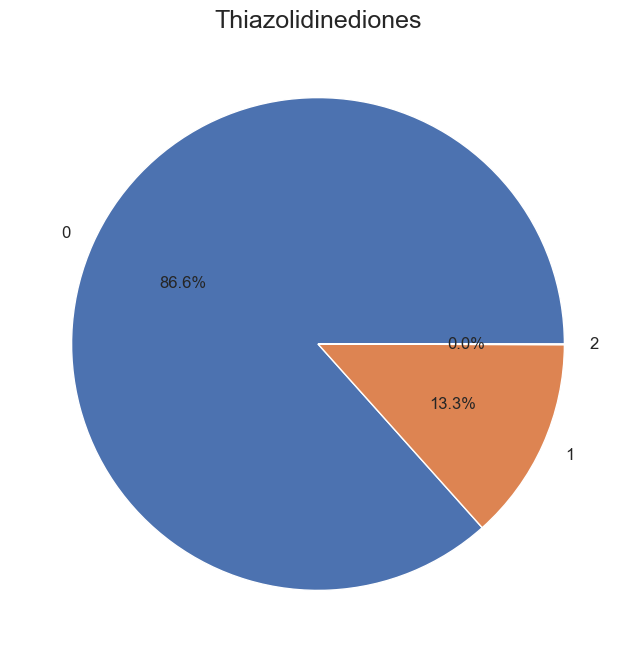

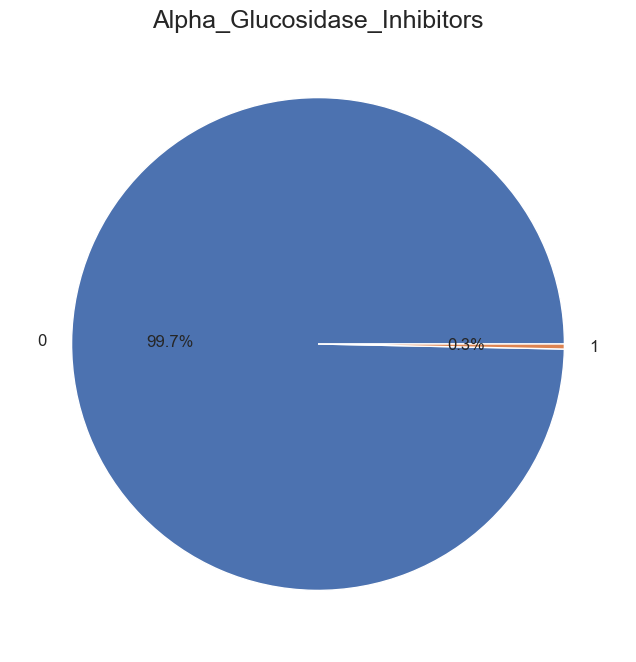

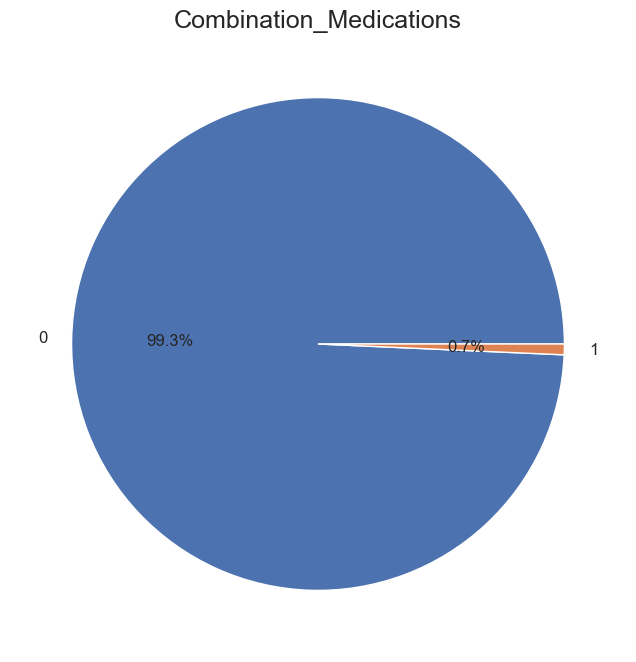

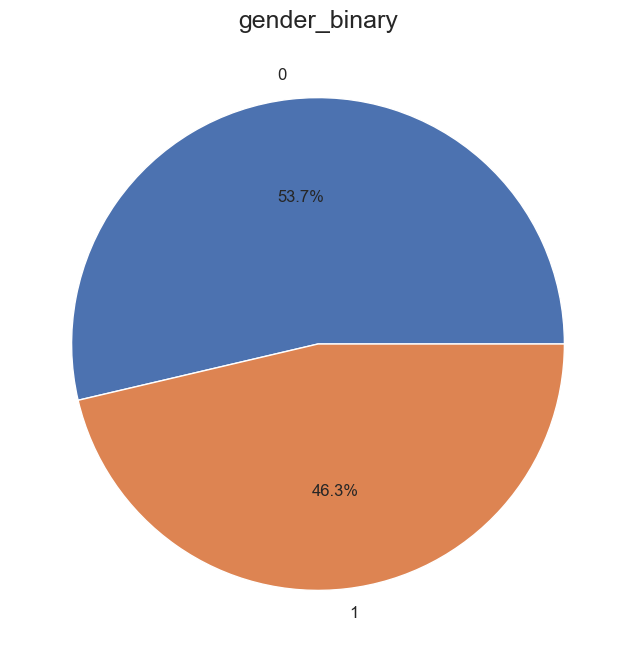

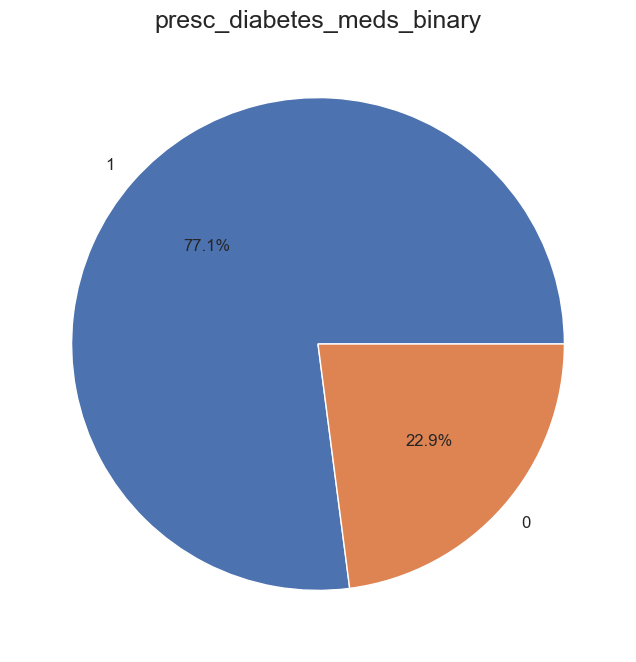

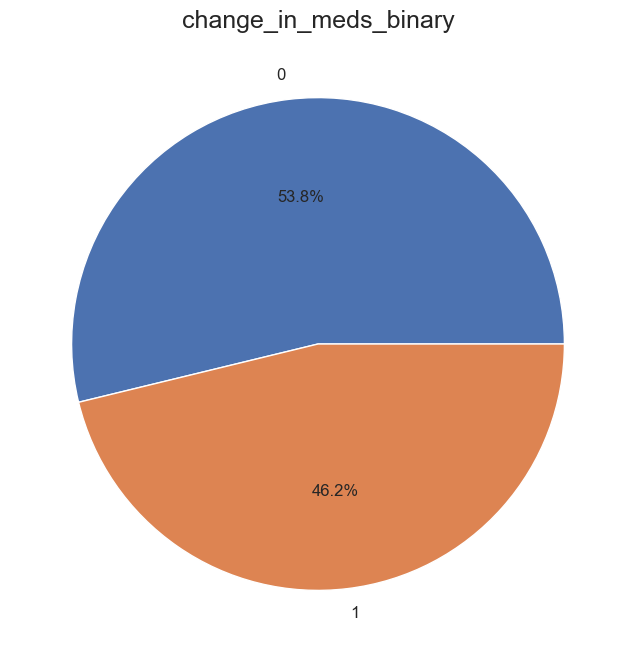

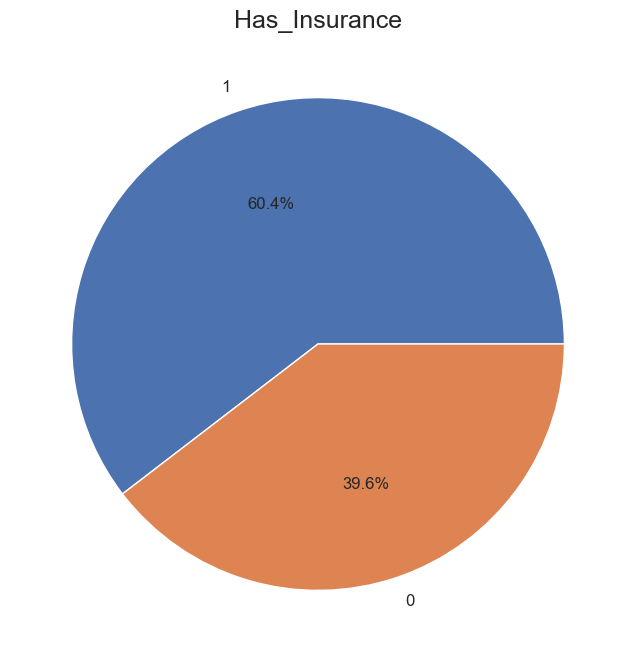

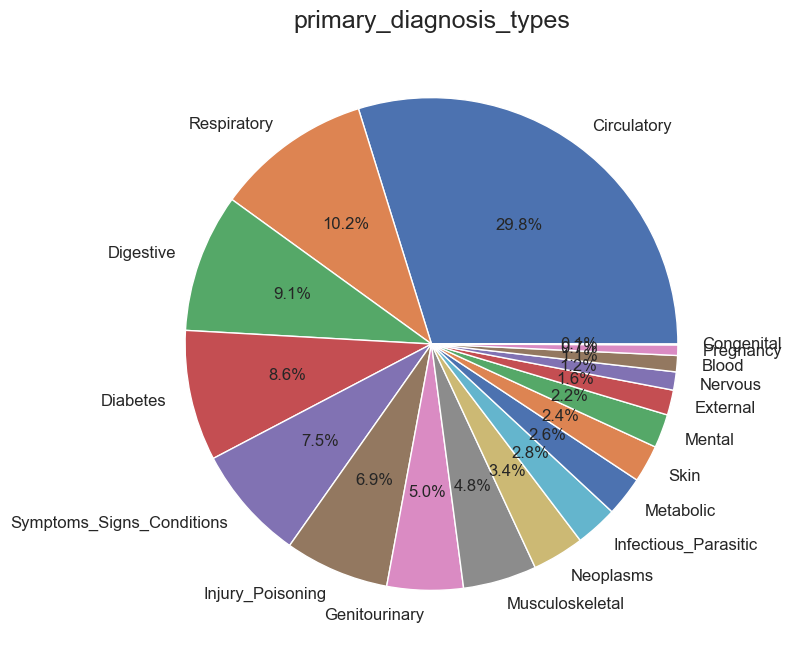

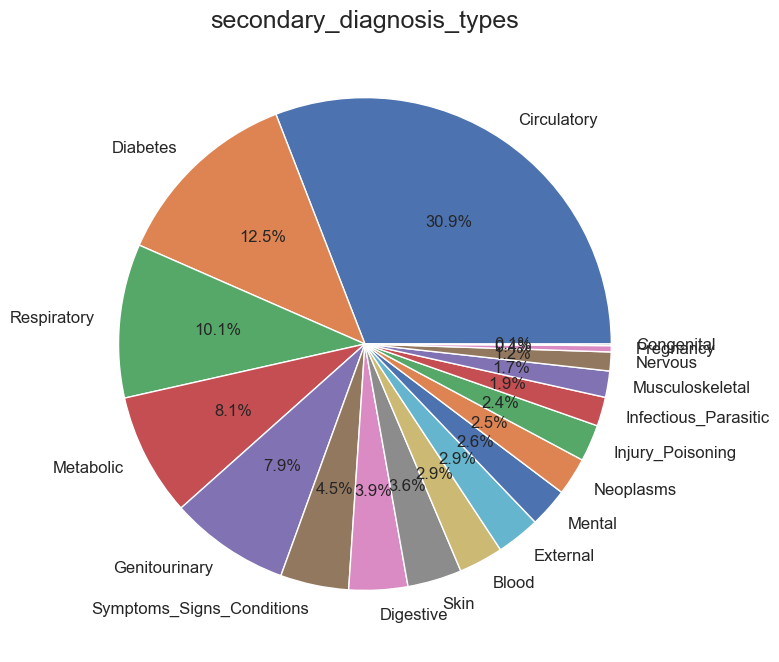

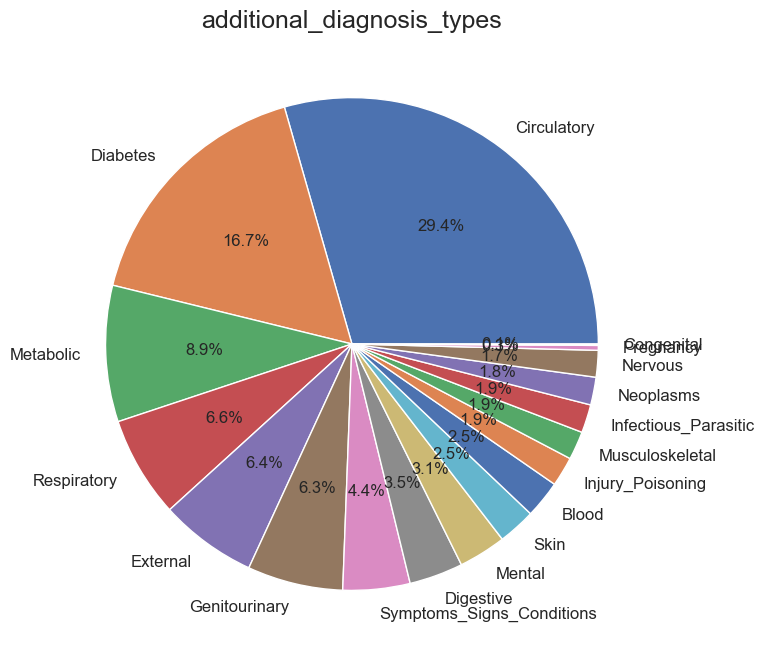

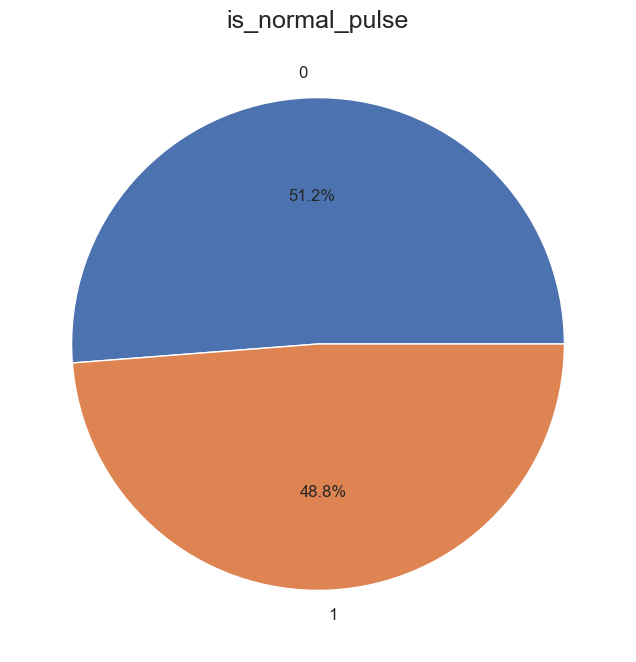

In [27]:
for feature in non_metric_features:
    plt.figure(figsize=(8, 8))
    non_metric_features[feature].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(feature)
    plt.ylabel('')  
    plt.show()

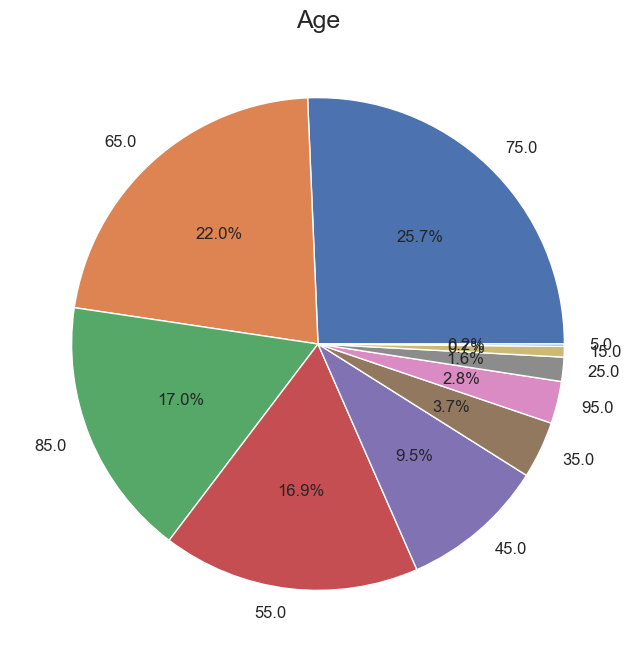

In [28]:
plt.figure(figsize=(8, 8))
metric_features['Midpoint_Age'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Age')
plt.ylabel('')  # Para remover o nome da coluna do eixo y
plt.show()

### Correlation Matrix

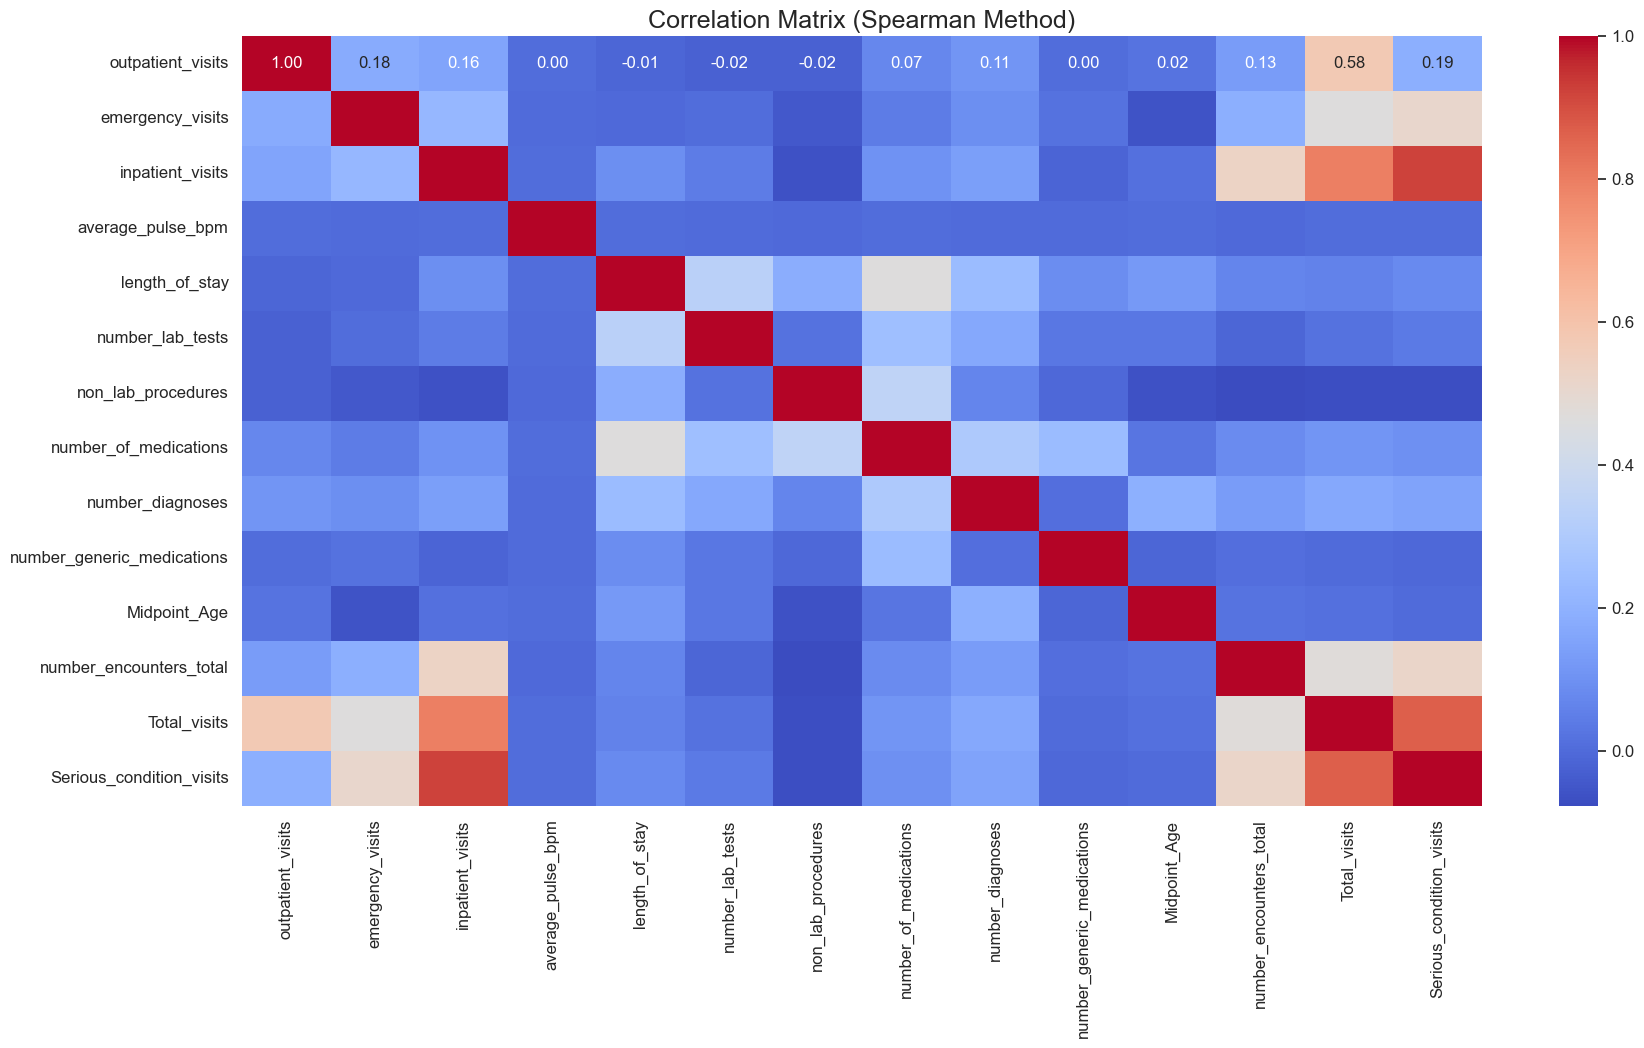

In [29]:
corr_matrix = metric_features.corr(method='spearman')

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Spearman Method)")
plt.show()